### Post modeling EDA

In [2]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the saved 'estimated' file which is a dataframe containing predicted movie ratings
est = pd.read_csv('estimated')
est.head(2)

Unnamed: 0  userId  movieId  estimatedrating
0           0       1        1         4.677118
1           1       1        3         4.229642

In [4]:
est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941364 entries, 0 to 5941363
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           int64  
 1   movieId          int64  
 2   estimatedrating  float64
dtypes: float64(1), int64(2)
memory usage: 136.0 MB


In [6]:
est.isna().sum()

userId             0
movieId            0
estimatedrating    0
dtype: int64

In [7]:
est.nunique()

userId                 611
movieId               9724
estimatedrating    5487779
dtype: int64

In [8]:
act = pd.read_csv('cleaneddata')
act.head(2)

Unnamed: 0  userId  movieId  rating                    title  \
0           0       1        1     4.0         Toy Story (1995)   
1           1       1        3     4.0  Grumpier Old Men (1995)   

                                        genres  year  Sci-Fi  Romance  Horror  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995   False    False   False   
1                               Comedy|Romance  1995   False     True   False   

   ...  Crime  Adventure  Film-Noir  Western    War  Documentary   IMAX  \
0  ...  False       True      False    False  False        False  False   
1  ...  False      False      False    False  False        False  False   

   Animation  Mystery  Musical  
0       True    False    False  
1      False    False    False  

[2 rows x 26 columns]

In [9]:
act.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64456 entries, 0 to 64455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       64456 non-null  int64  
 1   movieId      64456 non-null  int64  
 2   rating       64456 non-null  float64
 3   title        64456 non-null  object 
 4   genres       64456 non-null  object 
 5   year         64456 non-null  int64  
 6   Sci-Fi       64456 non-null  bool   
 7   Romance      64456 non-null  bool   
 8   Horror       64456 non-null  bool   
 9   Drama        64456 non-null  bool   
 10  Action       64456 non-null  bool   
 11  Children     64456 non-null  bool   
 12  Fantasy      64456 non-null  bool   
 13  Thriller     64456 non-null  bool   
 14  Comedy       64456 non-null  bool   
 15  Crime        64456 non-null  bool   
 16  Adventure    64456 non-null  bool   
 17  Film-Noir    64456 non-null  bool   
 18  Western      64456 non-null  bool   
 19  War 

In [11]:
act.isna().sum()

userId         0
movieId        0
rating         0
title          0
genres         0
year           0
Sci-Fi         0
Romance        0
Horror         0
Drama          0
Action         0
Children       0
Fantasy        0
Thriller       0
Comedy         0
Crime          0
Adventure      0
Film-Noir      0
Western        0
War            0
Documentary    0
IMAX           0
Animation      0
Mystery        0
Musical        0
dtype: int64

In [12]:
act.nunique()

userId          246
movieId        1968
rating           10
title          1968
genres          491
year             86
Sci-Fi            2
Romance           2
Horror            2
Drama             2
Action            2
Children          2
Fantasy           2
Thriller          2
Comedy            2
Crime             2
Adventure         2
Film-Noir         2
Western           2
War               2
Documentary       2
IMAX              2
Animation         2
Mystery           2
Musical           2
dtype: int64

First want to look at EDA differences between the actual user ratings vs the model predicted ratings.

In [13]:
df_inner = act.merge(est, how='inner')

In [14]:
df_inner

userId  movieId  rating                                title  \
0           1        1     4.0                     Toy Story (1995)   
1           1        3     4.0              Grumpier Old Men (1995)   
2           1        6     4.0                          Heat (1995)   
3           1       47     5.0          Seven (a.k.a. Se7en) (1995)   
4           1       50     5.0           Usual Suspects, The (1995)   
...       ...      ...     ...                                  ...   
64451     610   164179     5.0                       Arrival (2016)   
64452     610   166528     4.0  Rogue One: A Star Wars Story (2016)   
64453     610   168248     5.0        John Wick: Chapter Two (2017)   
64454     610   168250     5.0                       Get Out (2017)   
64455     610   168252     5.0                         Logan (2017)   

                                            genres  year  Sci-Fi  Romance  \
0      Adventure|Animation|Children|Comedy|Fantasy  1995   False    False   
1                                   Comedy|Romance  1995   False     True   
2                            Action|Crime|Thriller  1995   False    False   
3                                 Mystery|Thriller  1995   False    False   
4                           Crime|Mystery|Thriller  1995   False    False   
...                                            ...   ...     ...      ...   
64451                                       Sci-Fi  2016    True    False   
64452              Action|Adventure|Fantasy|Sci-Fi  2016    True    False   
64453                        Action|Crime|Thriller  2017   False    False   
64454                                       Horror  2017   False    False   
64455                                Action|Sci-Fi  2017    True    False   

       Horror  Drama  ...  Adventure  Film-Noir  Western    War  Documentary  \
0       False  False  ...       True      False    False  False        False   
1       False  False  ...      False      False    False  False        False   
2       False  False  ...      False      False    False  False        False   
3       False  False  ...      False      False    False  False        False   
4       False  False  ...      False      False    False  False        False   
...       ...    ...  ...        ...        ...      ...    ...          ...   
64451   False  False  ...      False      False    False  False        False   
64452   False  False  ...       True      False    False  False        False   
64453   False  False  ...      False      False    False  False        False   
64454    True  False  ...      False      False    False  False        False   
64455   False  False  ...      False      False    False  False        False   

        IMAX  Animation  Mystery  Musical  estimatedrating  
0      False       True    False    False         4.677118  
1      False      False    False    False         4.229642  
2      False      False    False    False         4.307075  
3      False      False     True    False         4.680017  
4      False      False     True    False         4.739190  
...      ...        ...      ...      ...              ...  
64451  False      False    False    False         4.168689  
64452  False      False    False    False         4.052661  
64453  False      False    False    False         4.354674  
64454  False      False    False    False         4.053723  
64455  False      False    False    False         4.367306  

[64456 rows x 26 columns]

In terms of unpersonalized recommendations, we can suggest the top 10 highest rated movies based on model predictions

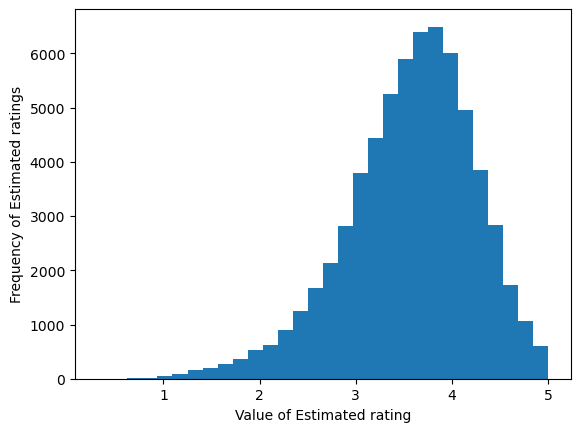

In [15]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30)
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

Similar to the actual ratings, in that the peak frequency was about 4 as well and less values at the lower end
(1, 2) etc.

In [16]:
df_inner.groupby('title').size().sort_values(ascending=False)

title
Pulp Fiction (1994)                          346
Fight Club (1999)                            192
Forrest Gump (1994)                          191
Matrix, The (1999)                           176
Star Wars: Episode IV - A New Hope (1977)    171
                                            ... 
Fly, The (1958)                               11
House on Haunted Hill (1999)                  11
How the Grinch Stole Christmas! (1966)        11
Proof of Life (2000)                          11
Good Girl, The (2002)                         11
Length: 1968, dtype: int64

In [17]:
#Plot the top 10 most watched movies
topmovies = df_inner.groupby('title').size().sort_values(ascending=False).head(10)


In [18]:
df_left = act.merge(est, how='outer')

In [19]:
df_left.isna().sum()

userId                   0
movieId                  0
rating             5878430
title              5878430
genres             5878430
year               5878430
Sci-Fi             5878430
Romance            5878430
Horror             5878430
Drama              5878430
Action             5878430
Children           5878430
Fantasy            5878430
Thriller           5878430
Comedy             5878430
Crime              5878430
Adventure          5878430
Film-Noir          5878430
Western            5878430
War                5878430
Documentary        5878430
IMAX               5878430
Animation          5878430
Mystery            5878430
Musical            5878430
estimatedrating          0
dtype: int64

In [20]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942886 entries, 0 to 5942885
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           int64  
 1   movieId          int64  
 2   rating           float64
 3   title            object 
 4   genres           object 
 5   year             float64
 6   Sci-Fi           object 
 7   Romance          object 
 8   Horror           object 
 9   Drama            object 
 10  Action           object 
 11  Children         object 
 12  Fantasy          object 
 13  Thriller         object 
 14  Comedy           object 
 15  Crime            object 
 16  Adventure        object 
 17  Film-Noir        object 
 18  Western          object 
 19  War              object 
 20  Documentary      object 
 21  IMAX             object 
 22  Animation        object 
 23  Mystery          object 
 24  Musical          object 
 25  estimatedrating  float64
dtypes: float64(3), int64(2), object(21)
memory

In [21]:
df_inner['rating']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
64451    5.0
64452    4.0
64453    5.0
64454    5.0
64455    5.0
Name: rating, Length: 64456, dtype: float64

In [22]:
df_inner['estimatedrating']

0        4.677118
1        4.229642
2        4.307075
3        4.680017
4        4.739190
           ...   
64451    4.168689
64452    4.052661
64453    4.354674
64454    4.053723
64455    4.367306
Name: estimatedrating, Length: 64456, dtype: float64

In [23]:
df_inner.head(2)

userId  movieId  rating                    title  \
0       1        1     4.0         Toy Story (1995)   
1       1        3     4.0  Grumpier Old Men (1995)   

                                        genres  year  Sci-Fi  Romance  Horror  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995   False    False   False   
1                               Comedy|Romance  1995   False     True   False   

   Drama  ...  Adventure  Film-Noir  Western    War  Documentary   IMAX  \
0  False  ...       True      False    False  False        False  False   
1  False  ...      False      False    False  False        False  False   

   Animation  Mystery  Musical  estimatedrating  
0       True    False    False         4.677118  
1      False    False    False         4.229642  

[2 rows x 26 columns]

In [24]:
#Create genre labels
genrelabels = set()
for i in df_inner['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))

In [25]:
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [26]:
#Create columns for each genre to indicate T/F
for genre in genrelabels:
    df_inner[genre] = df_inner['genres'].apply(lambda x: genre in x)

In [27]:
matrix = df_inner.drop(['userId', 'movieId', 'estimatedrating', 'genres', 'year'], axis=1)
matrix.head(2)

rating                    title  Sci-Fi  Romance  Horror  Drama  Action  \
0     4.0         Toy Story (1995)   False    False   False  False   False   
1     4.0  Grumpier Old Men (1995)   False     True   False  False   False   

   Children  Fantasy  Thriller  ...  Crime  Adventure  Film-Noir  Western  \
0      True     True     False  ...  False       True      False    False   
1     False    False     False  ...  False      False      False    False   

     War  Documentary   IMAX  Animation  Mystery  Musical  
0  False        False  False       True    False    False  
1  False        False  False      False    False    False  

[2 rows x 21 columns]

Looking at the 10 highest ratings for each movie in every genre.

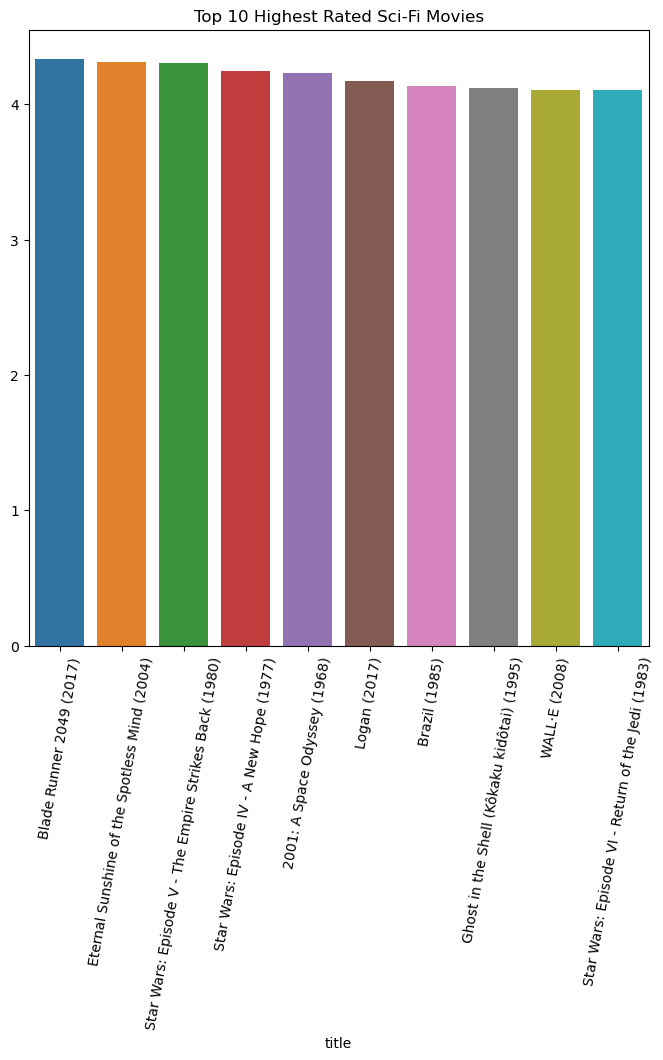

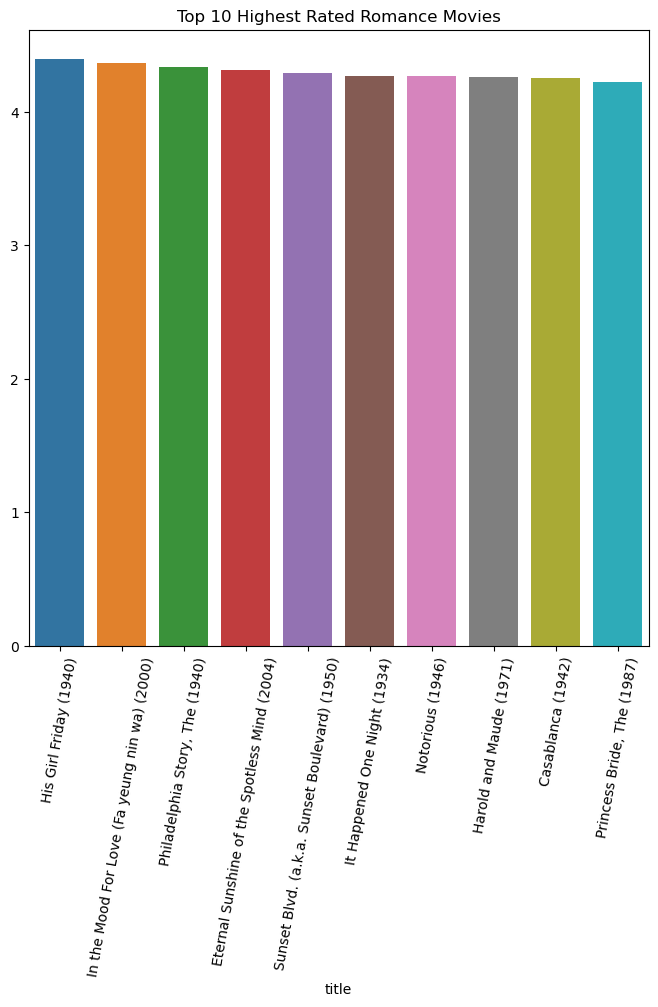

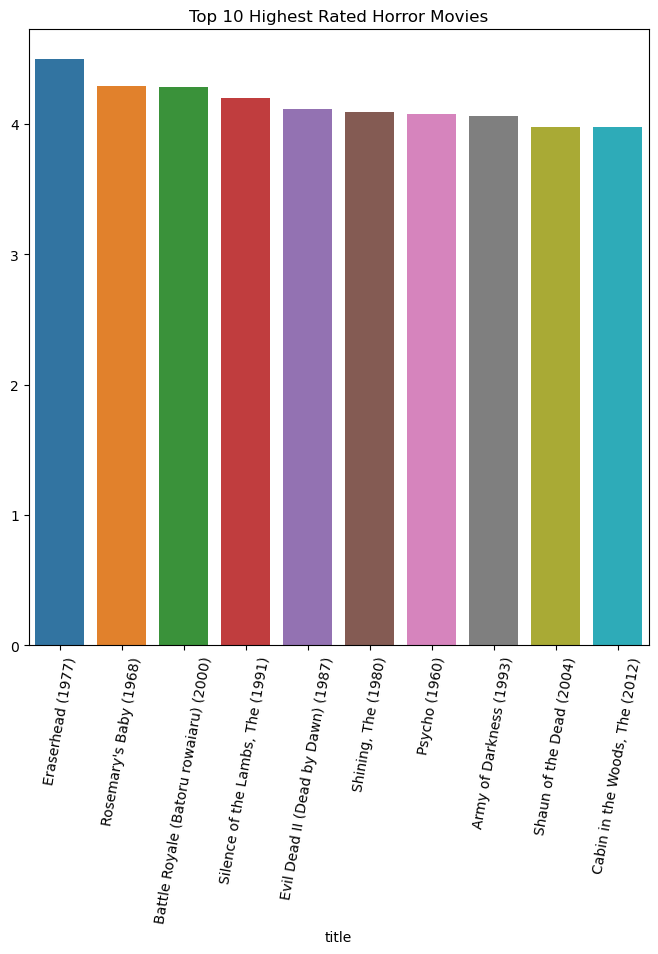

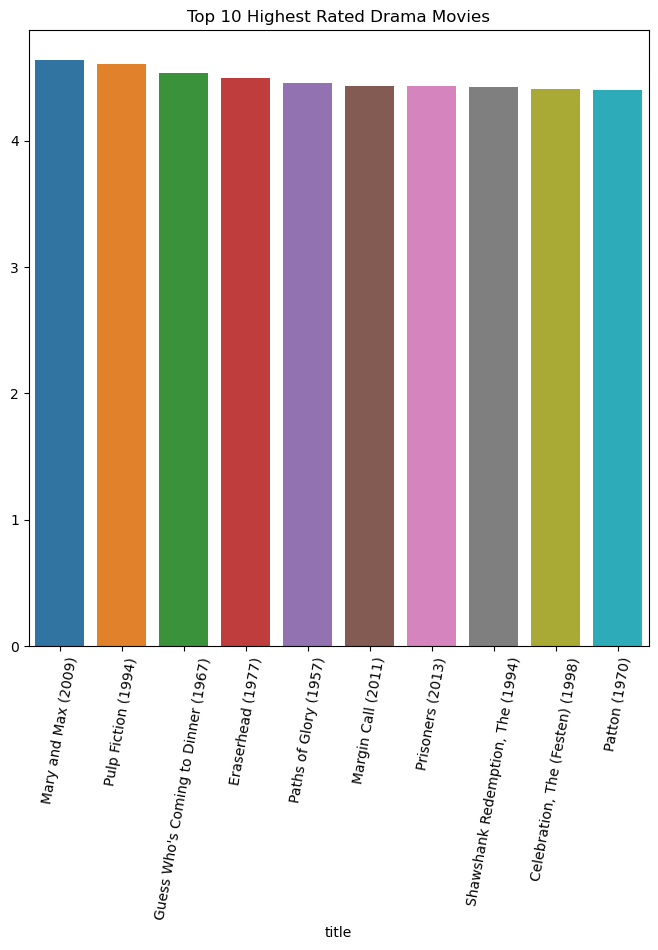

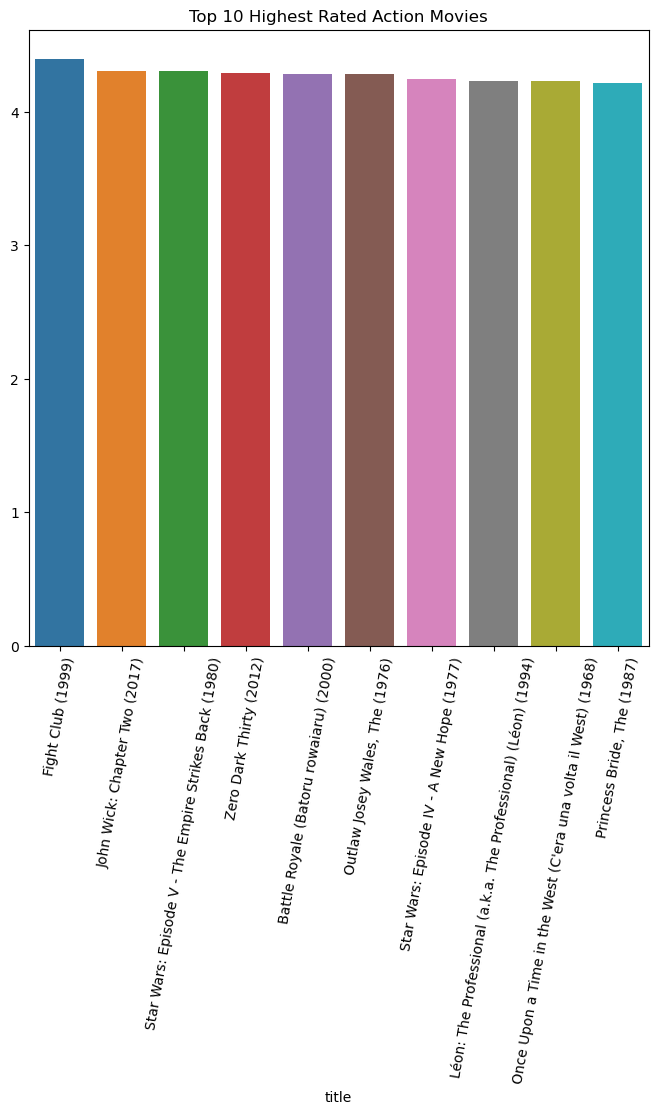

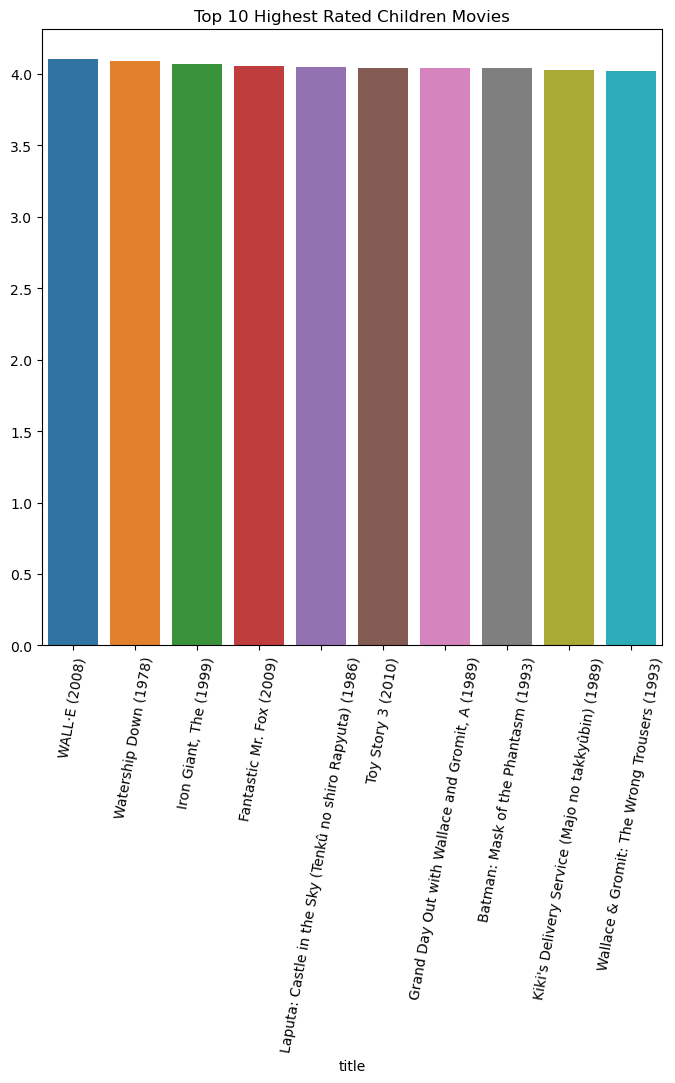

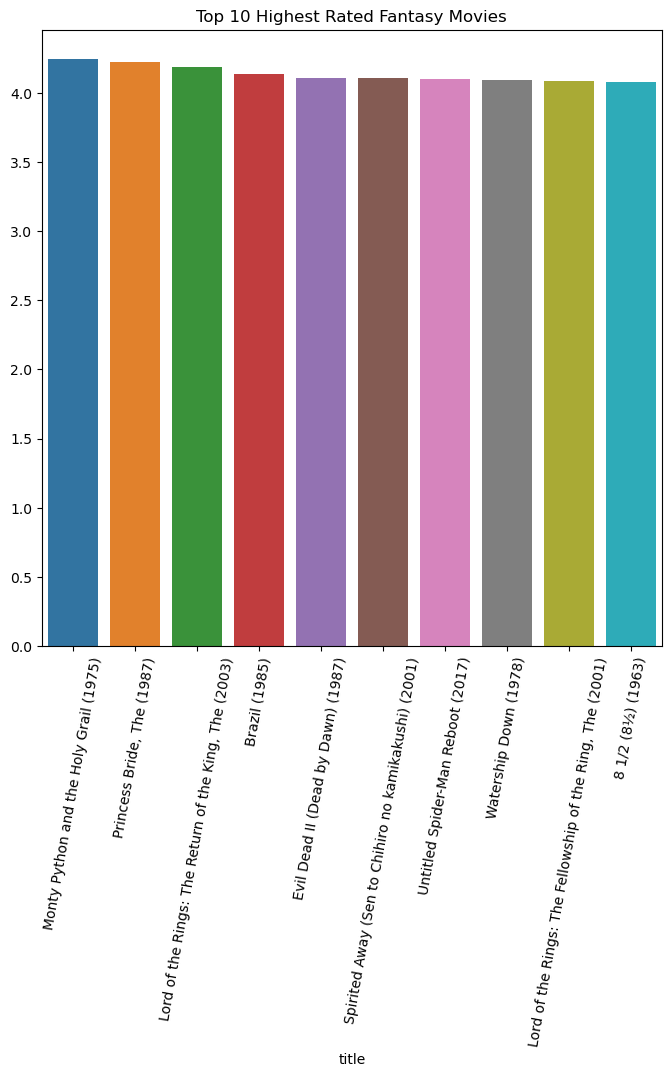

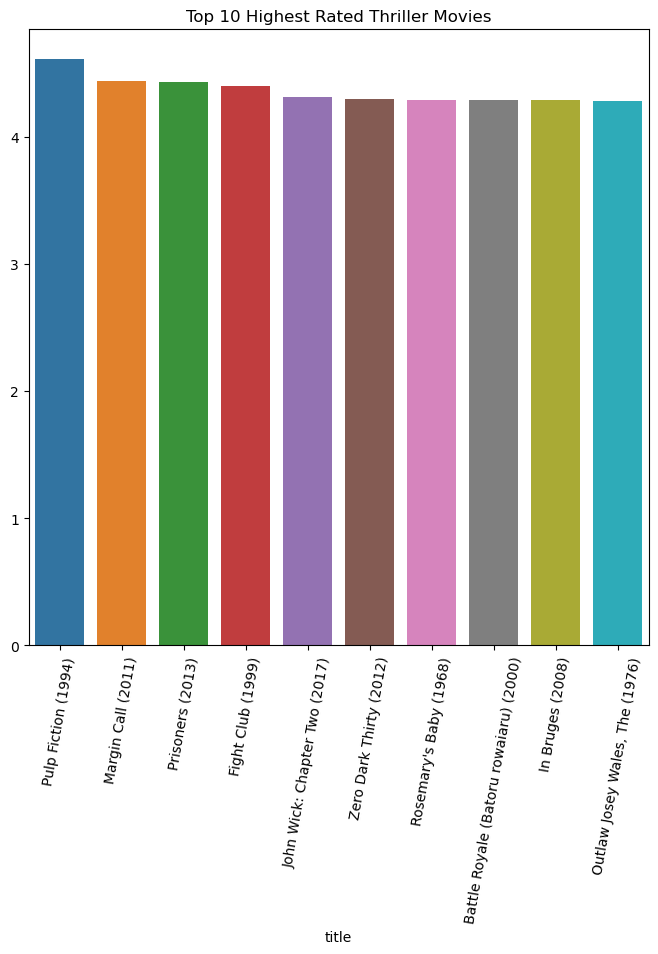

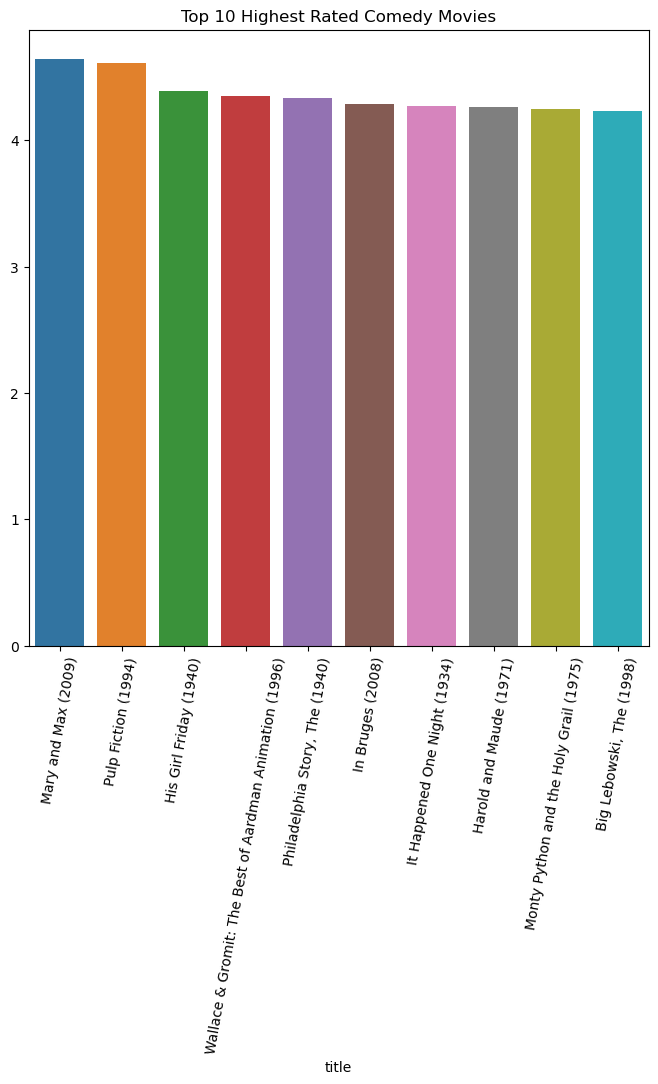

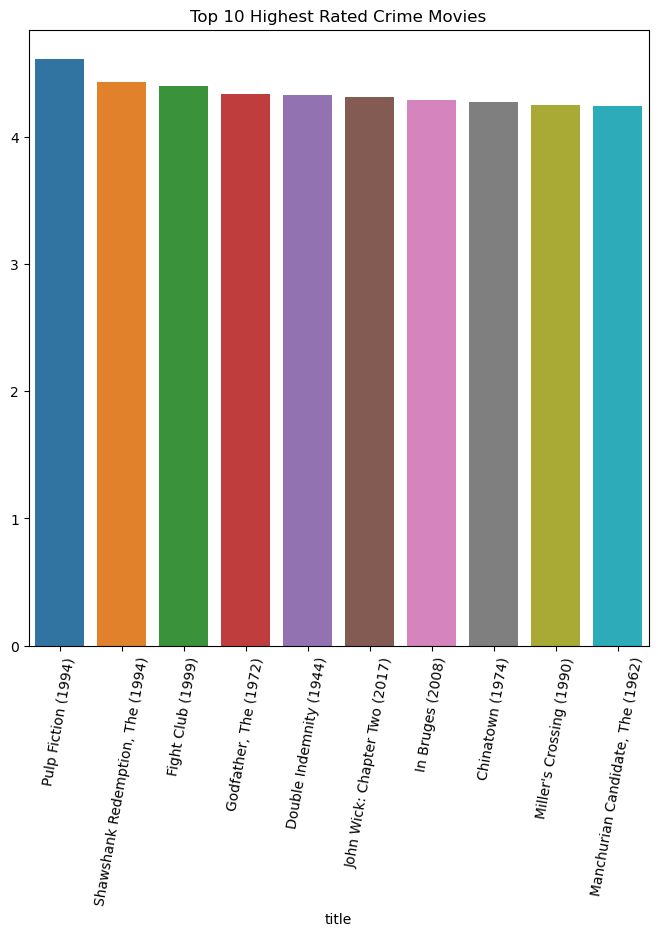

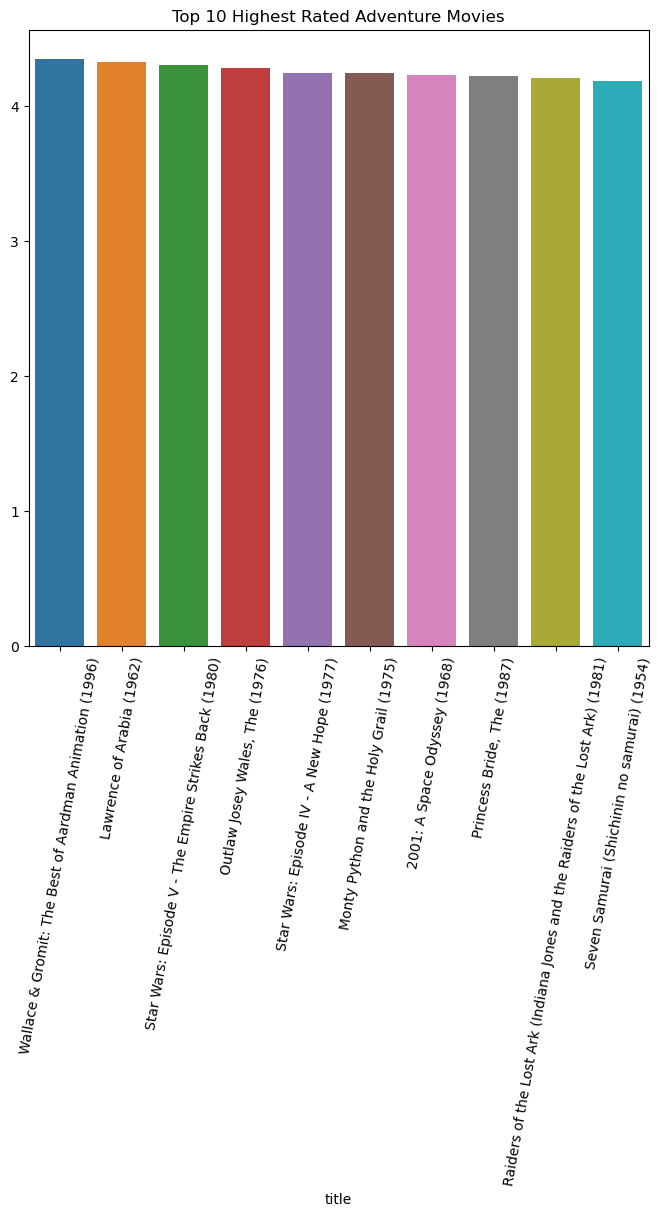

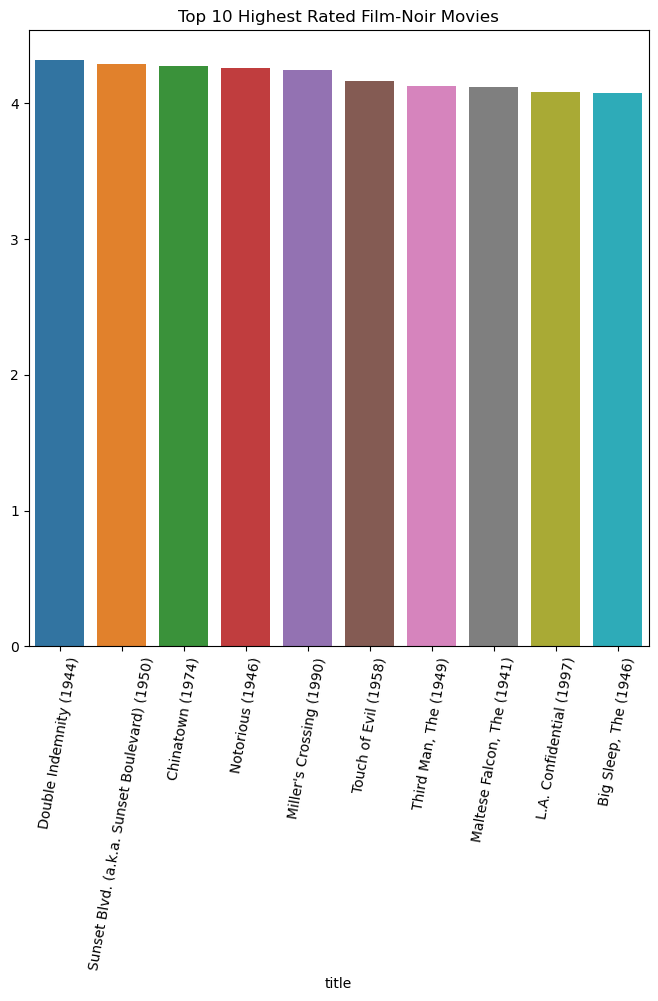

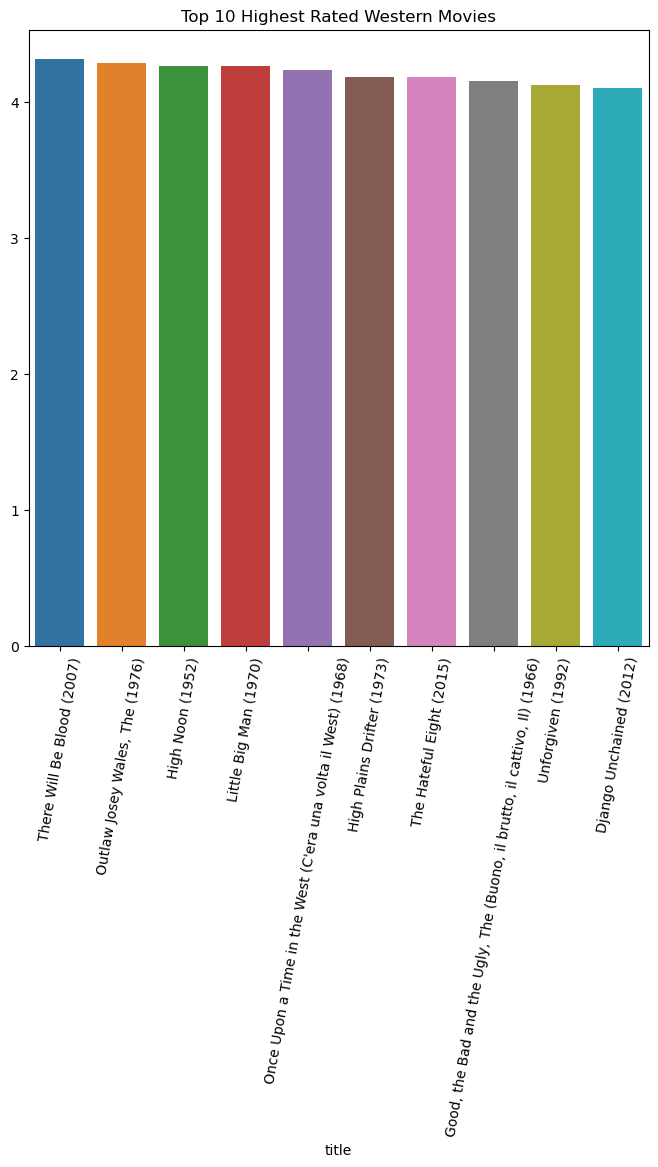

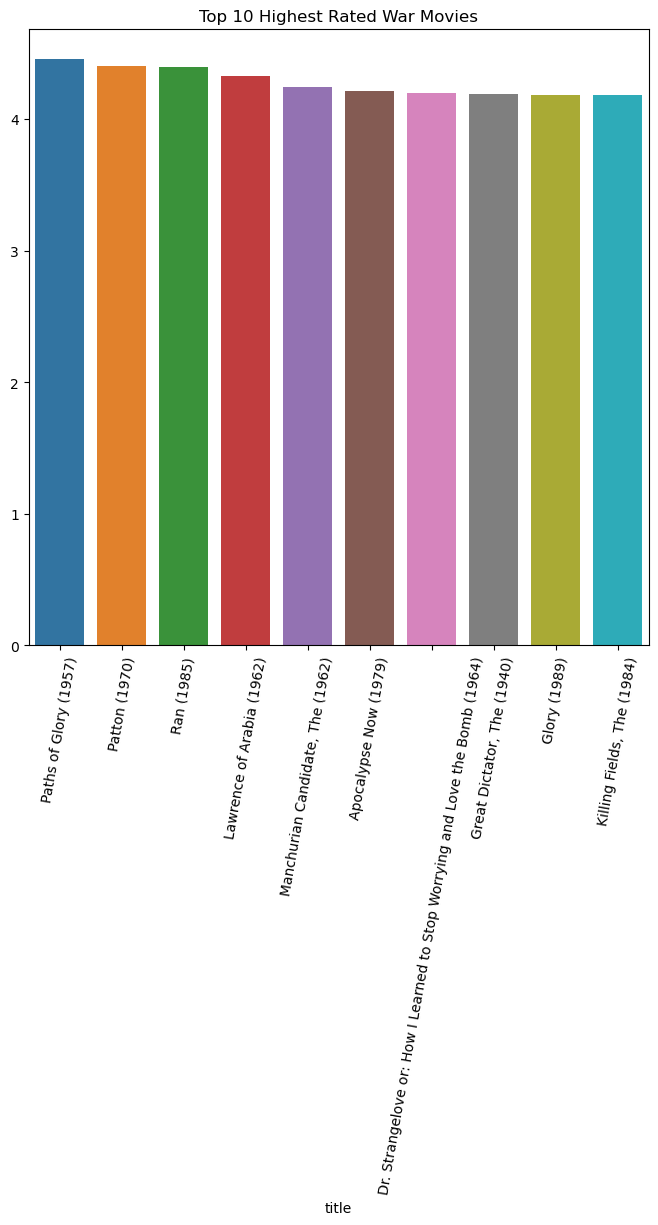

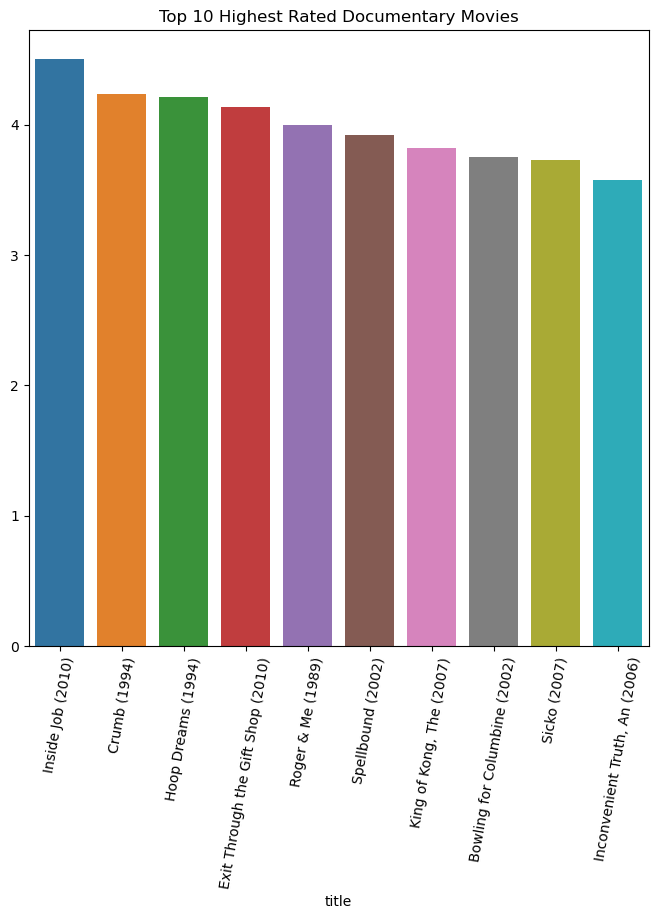

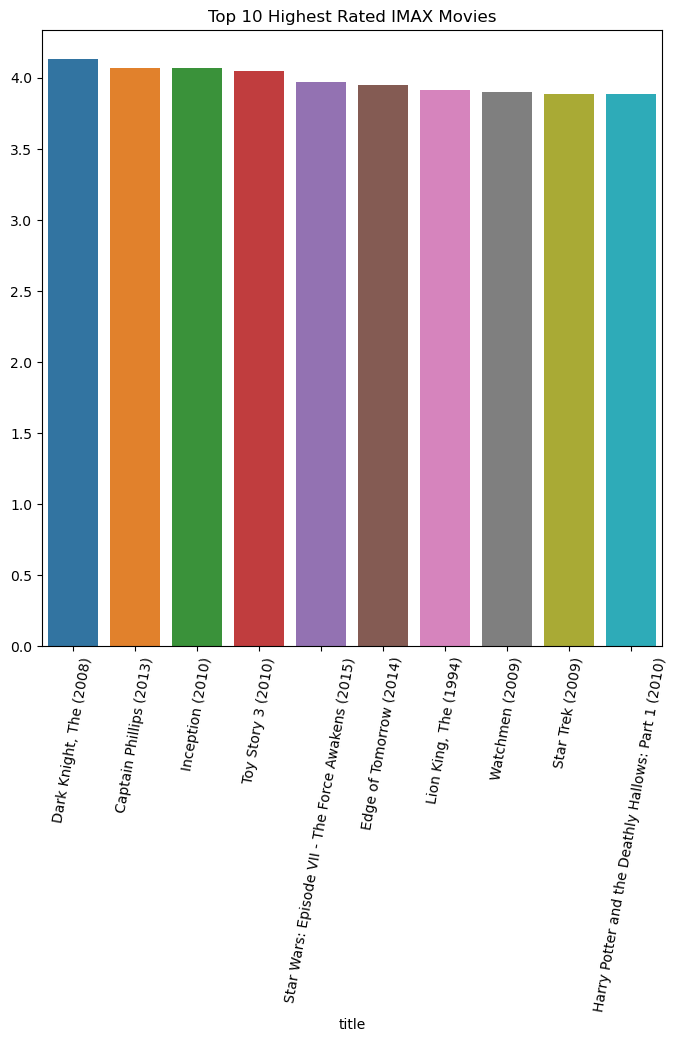

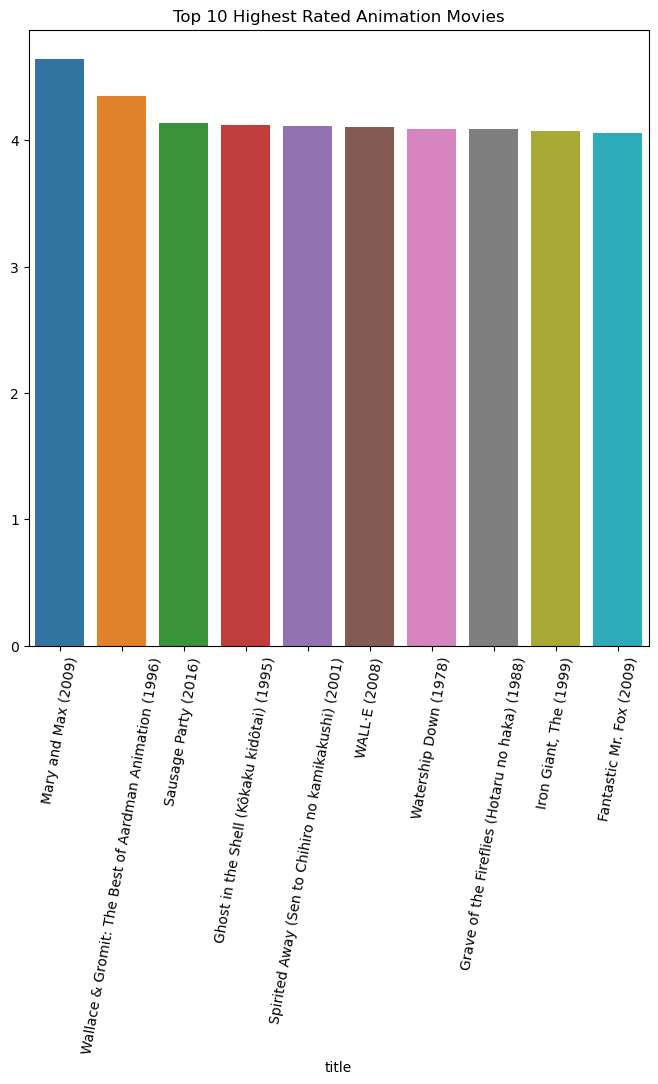

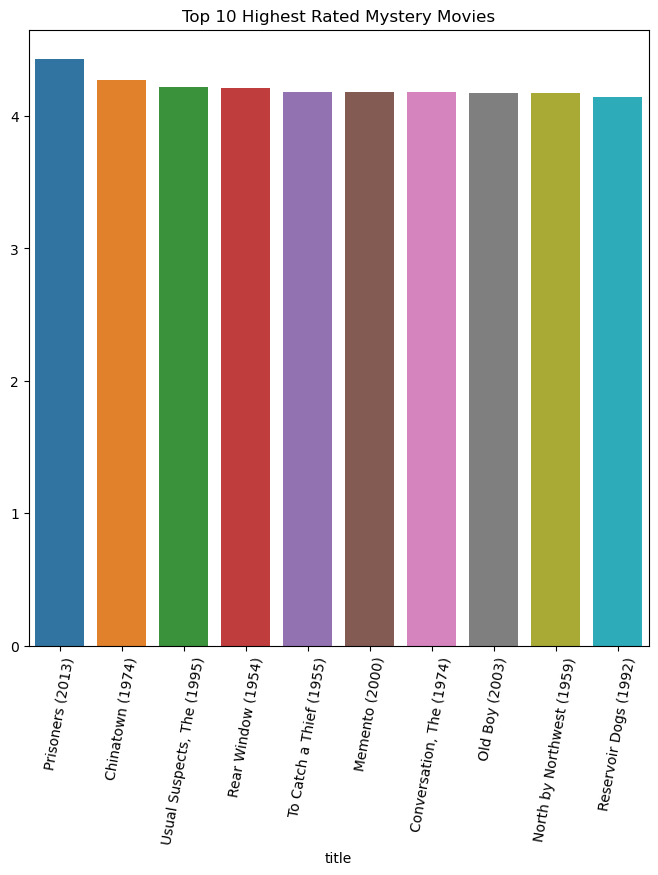

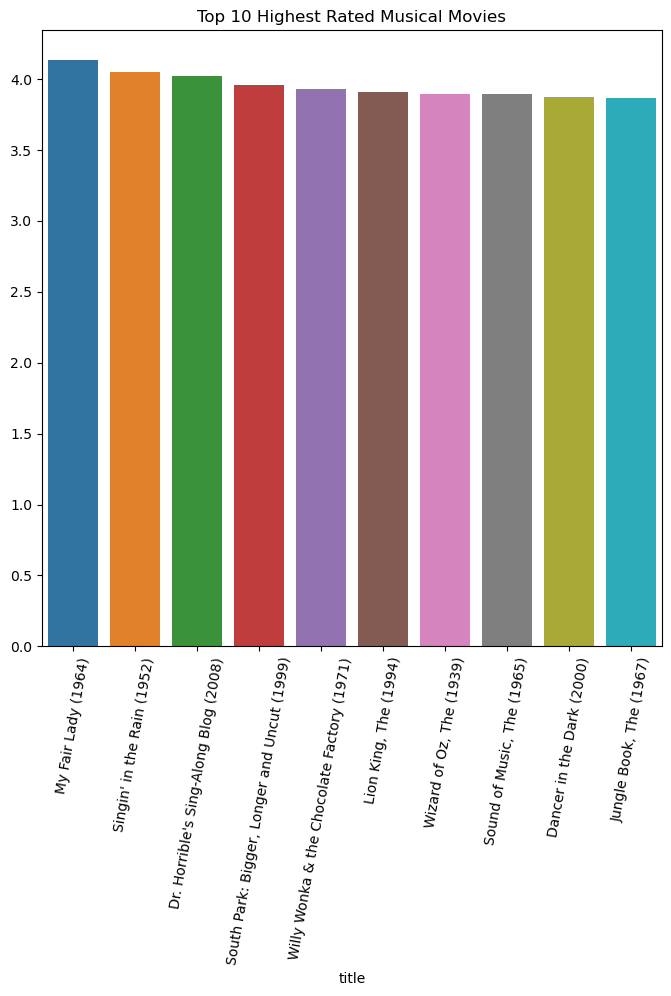

In [28]:
for gen in matrix.columns[2:]:
    x = matrix[(matrix[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
    sns.barplot(x=topmovies.index, y=topmovies.values)
    plt.title('Top 10 Highest Rated '+gen+' Movies')
    plt.savefig('.\images\Estimated data\Top 10 Highest Rated '+gen+' Movies')
    plt.xticks(rotation=80);

In [29]:
matrix2 = df_inner.drop(['userId', 'movieId', 'rating', 'genres', 'year'], axis=1)
matrix2.head(2)

title  Sci-Fi  Romance  Horror  Drama  Action  Children  \
0         Toy Story (1995)   False    False   False  False   False      True   
1  Grumpier Old Men (1995)   False     True   False  False   False     False   

   Fantasy  Thriller  Comedy  ...  Adventure  Film-Noir  Western    War  \
0     True     False    True  ...       True      False    False  False   
1    False     False    True  ...      False      False    False  False   

   Documentary   IMAX  Animation  Mystery  Musical  estimatedrating  
0        False  False       True    False    False         4.677118  
1        False  False      False    False    False         4.229642  

[2 rows x 21 columns]

Looking at the 10 highest model-predicted ratings for each movie in every genre to visualize differences.

ValueError: min() arg is an empty sequence

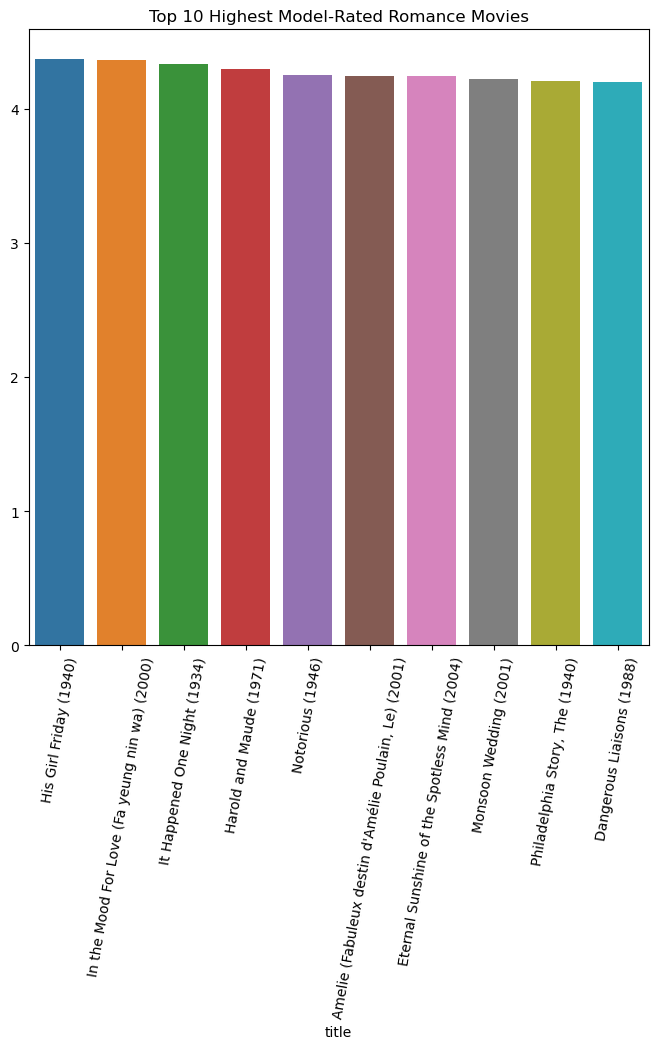

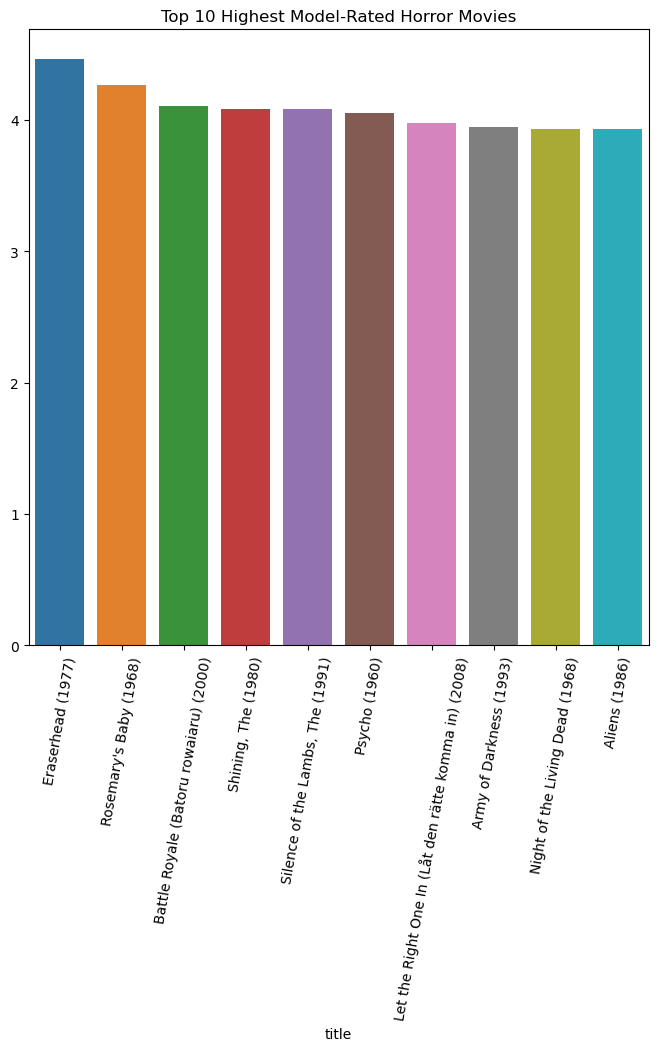

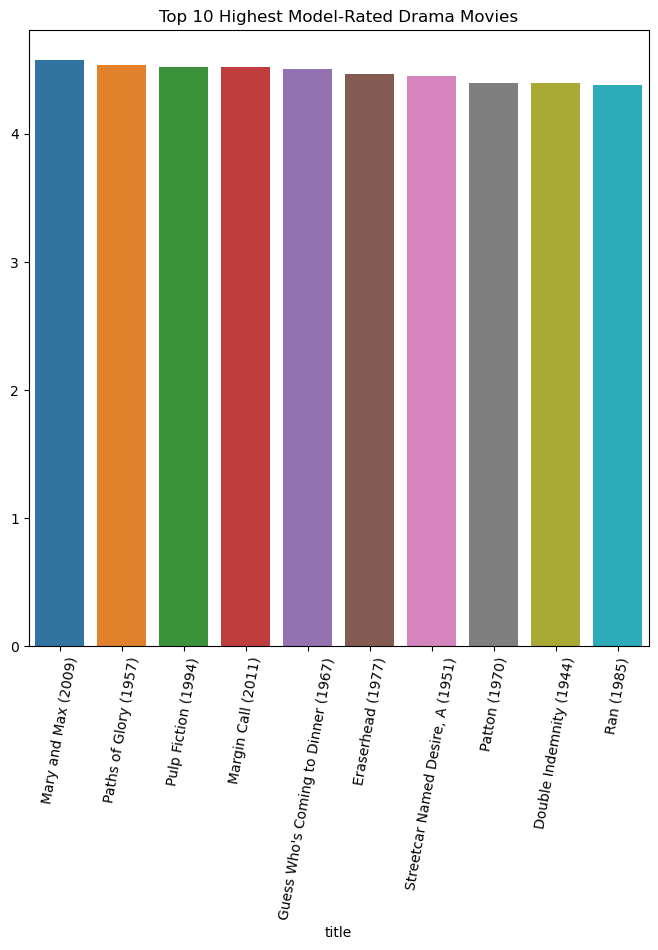

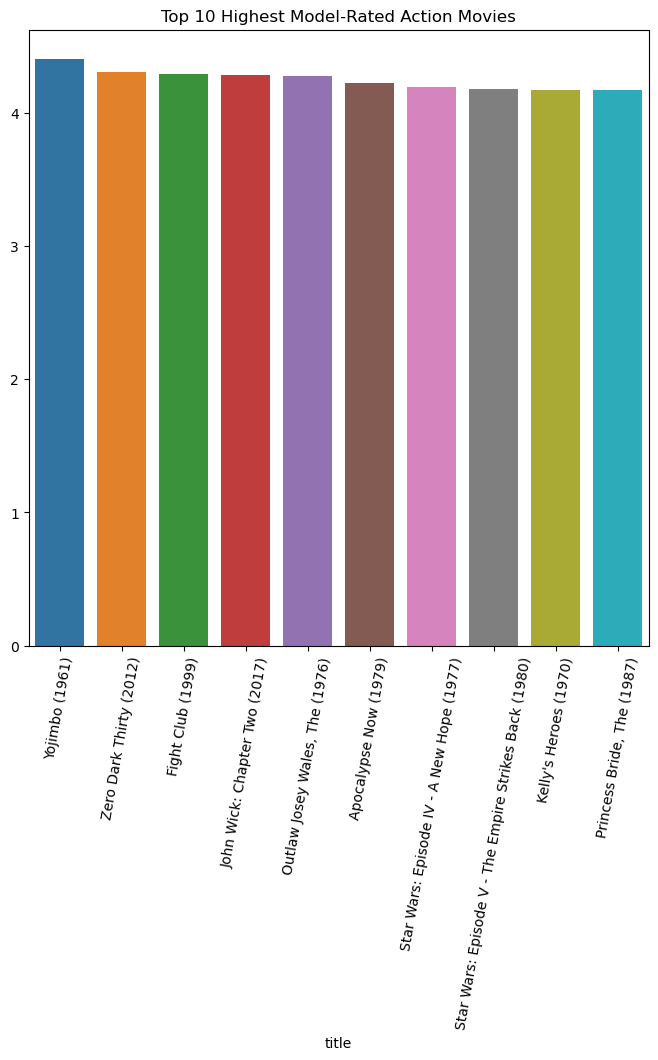

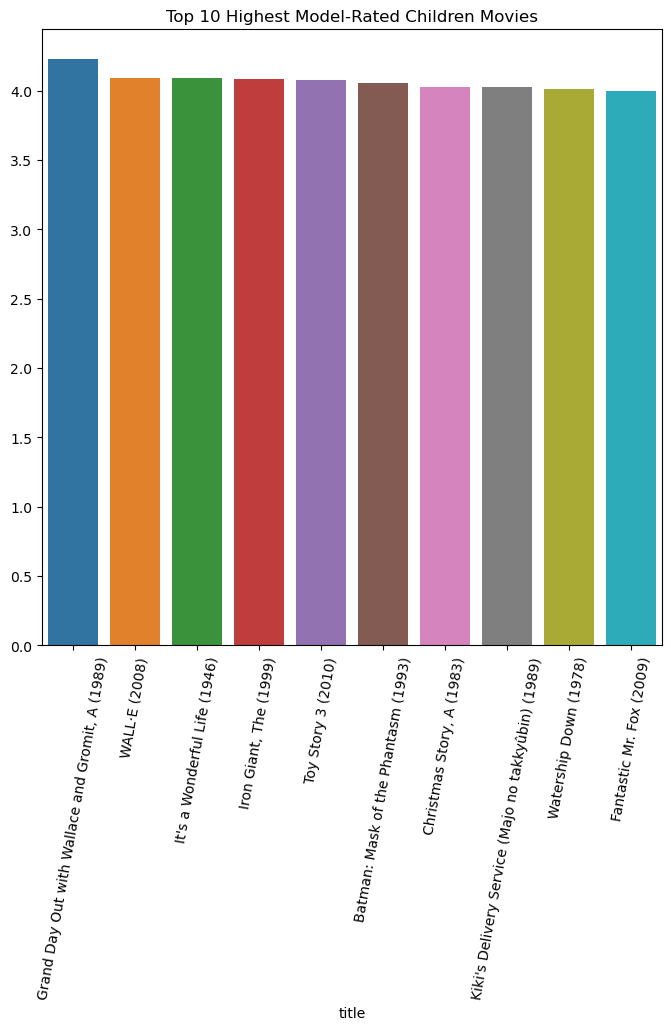

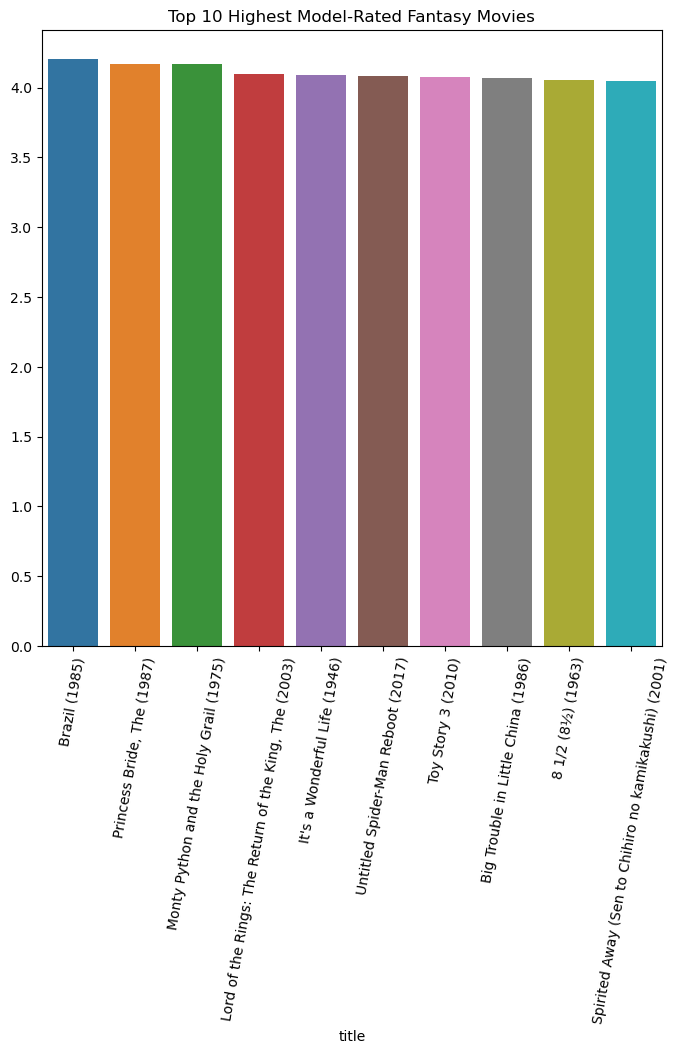

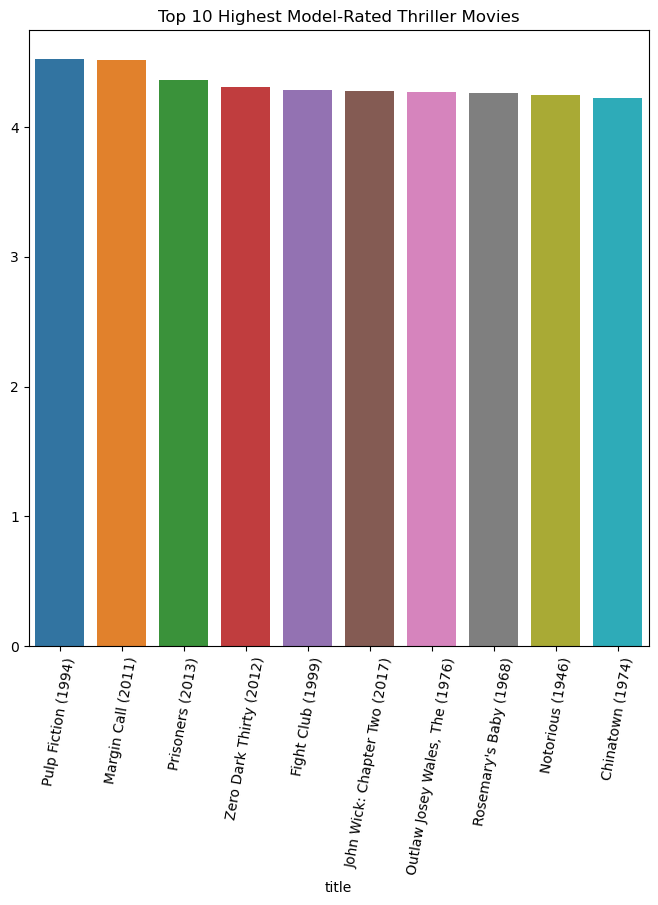

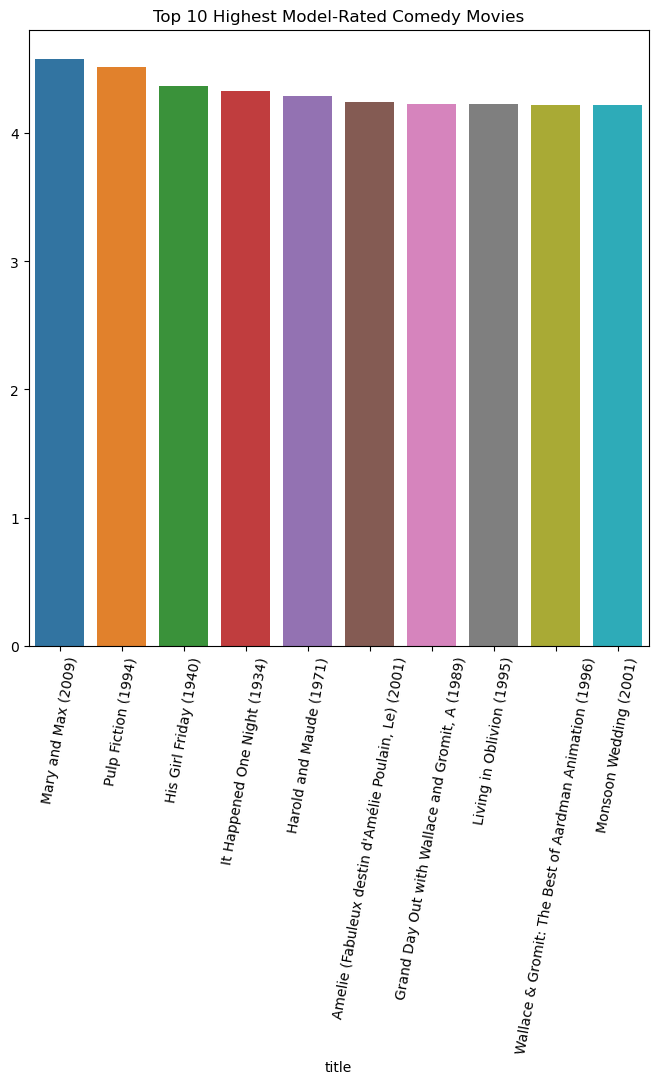

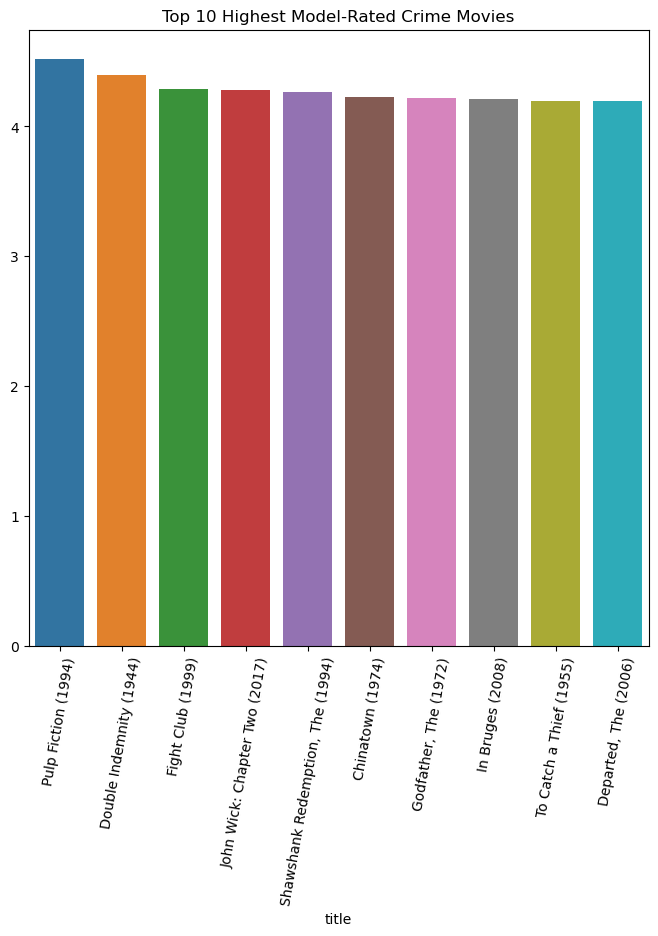

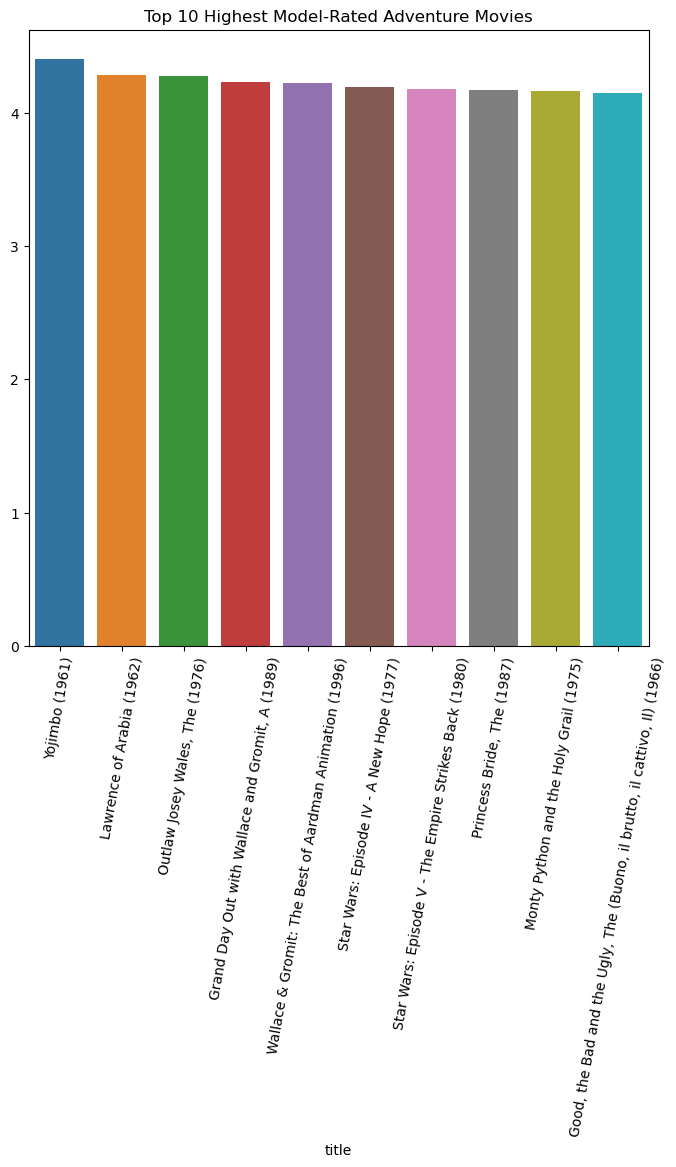

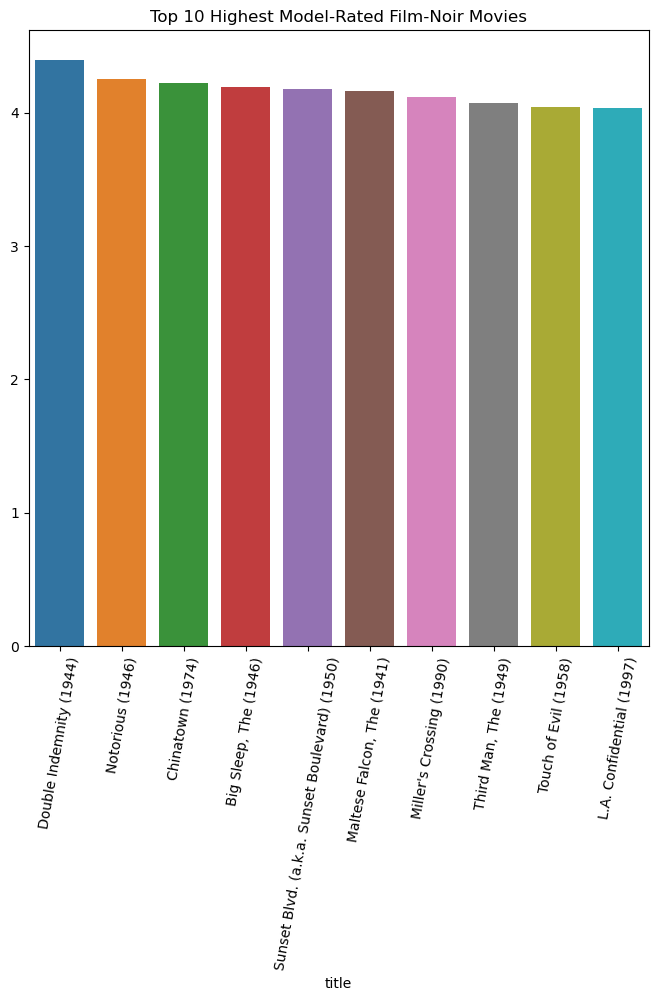

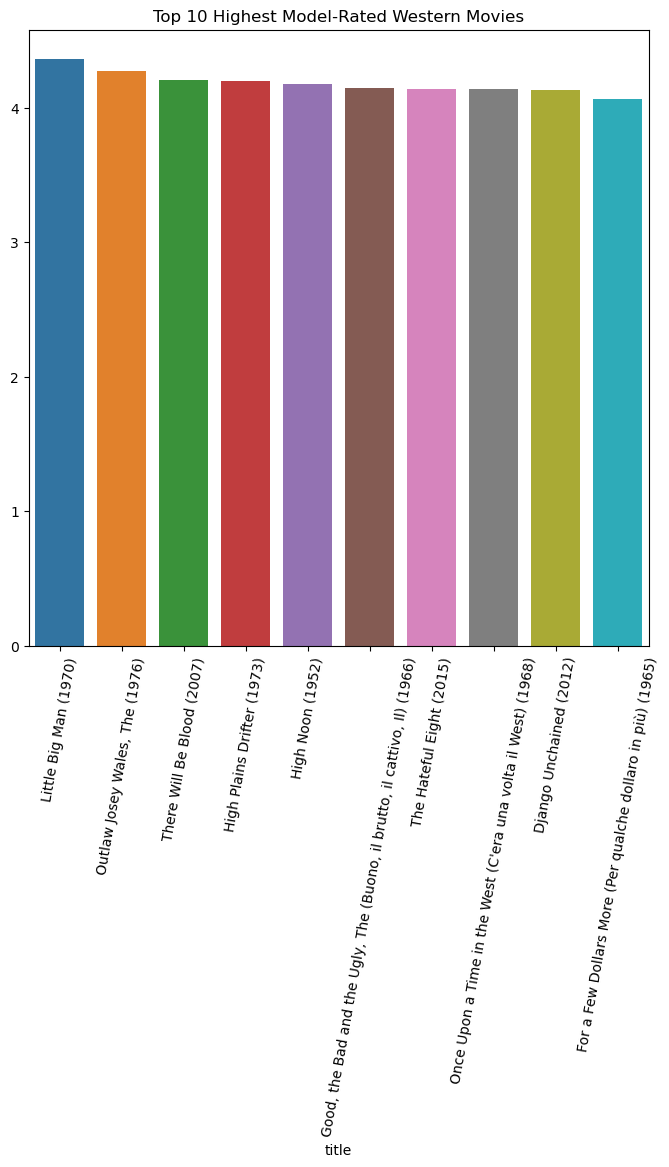

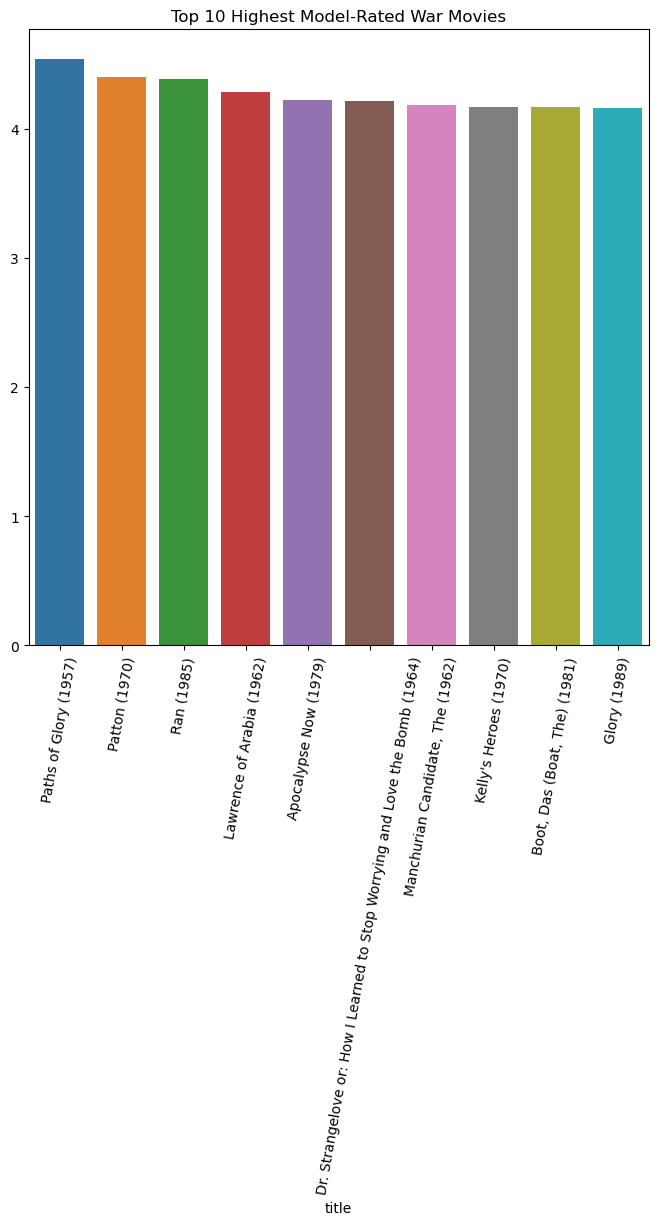

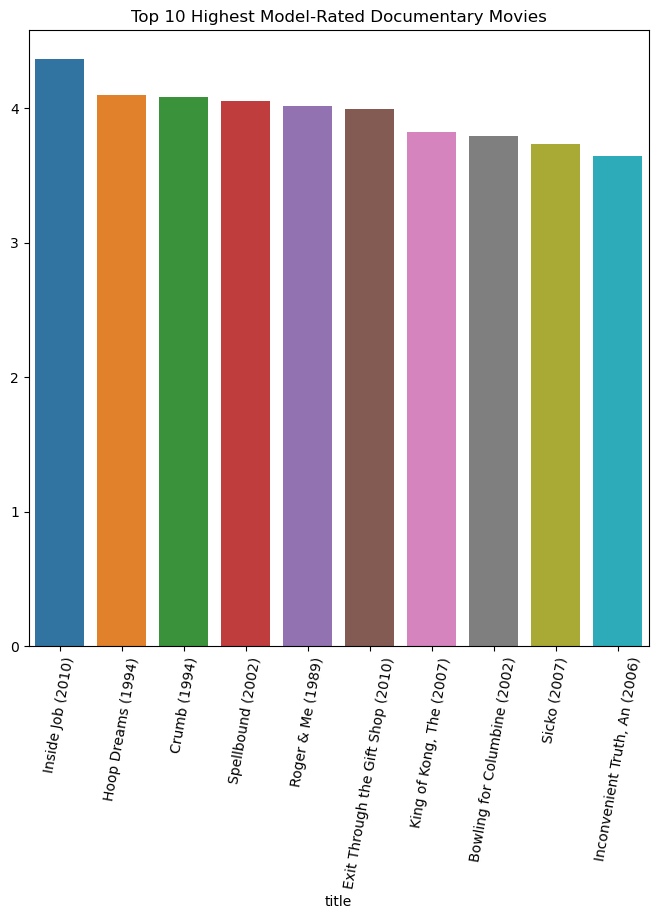

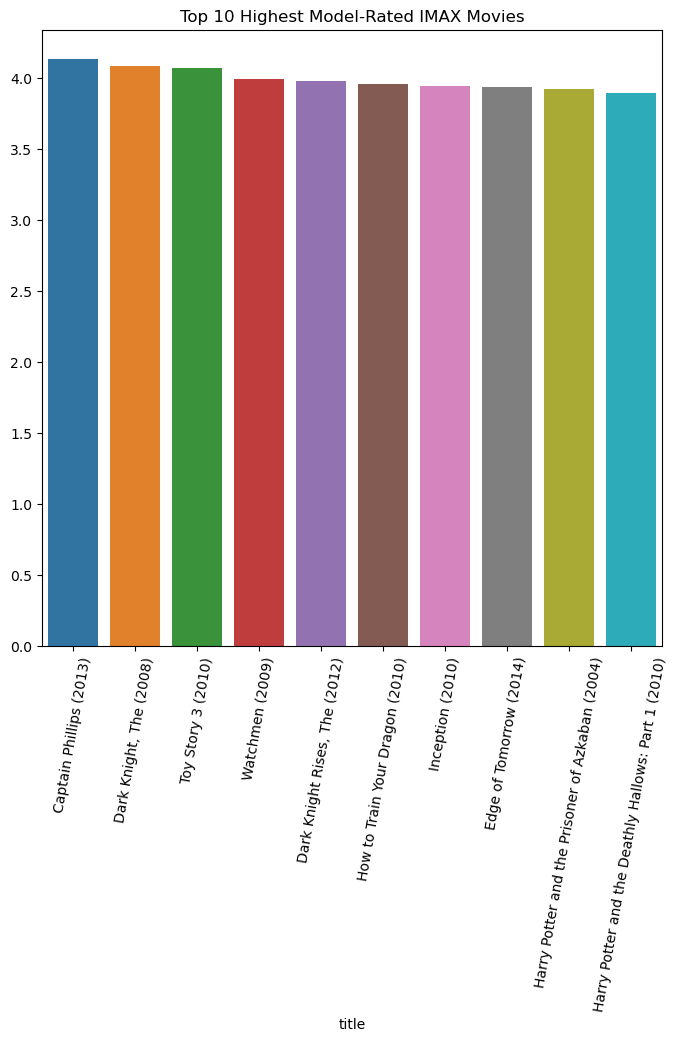

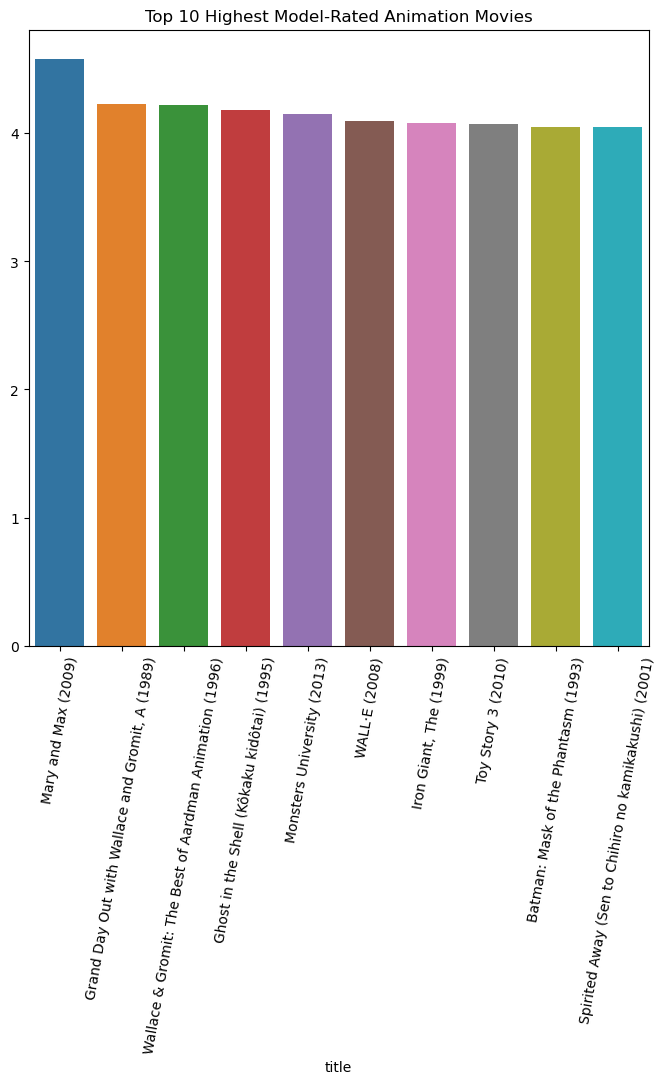

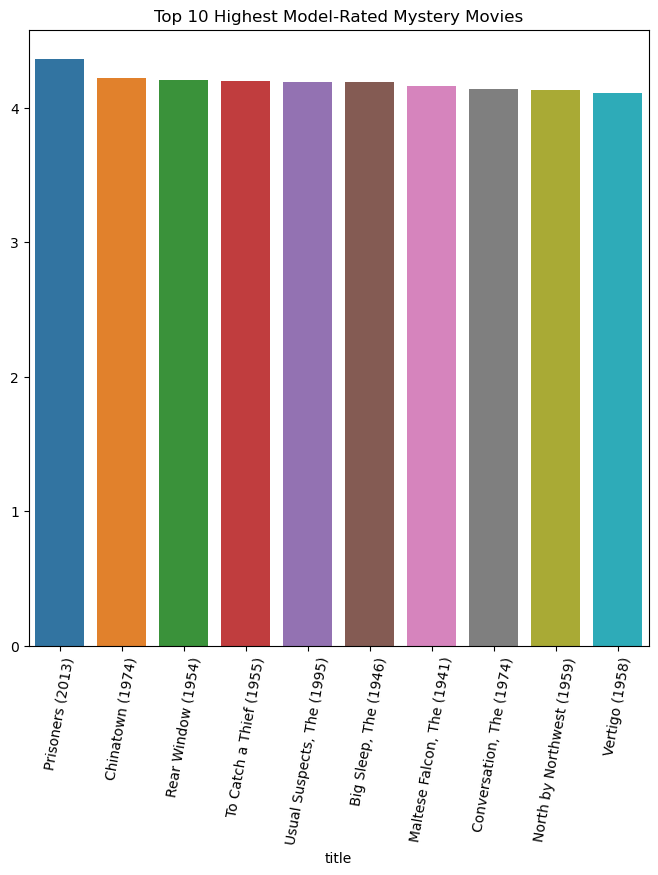

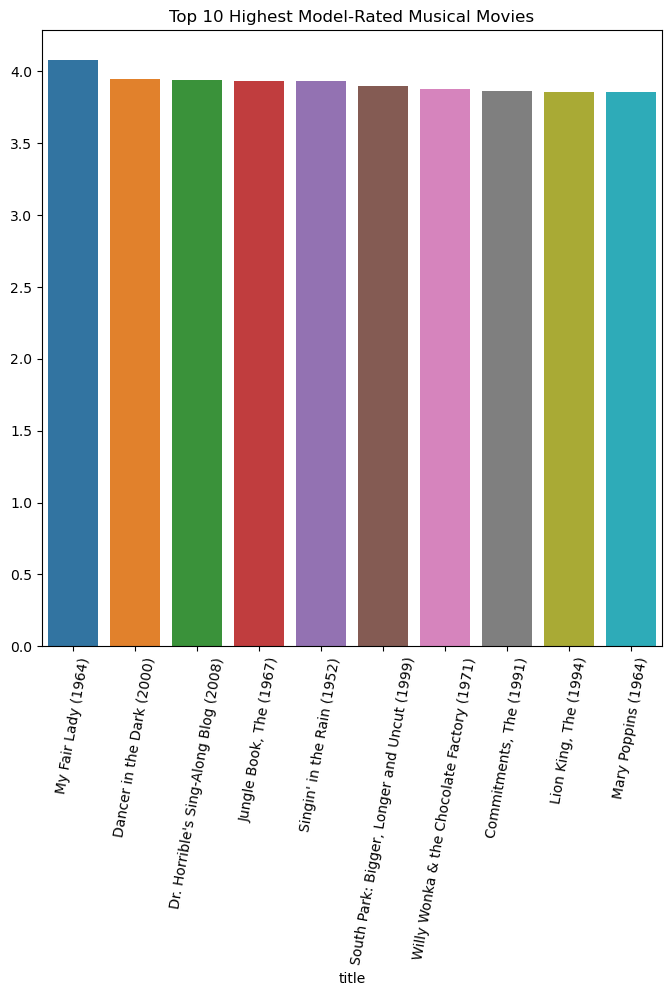

<Figure size 800x800 with 0 Axes>

In [31]:
for gen in matrix2.columns[2:]:
    x = matrix2[(matrix2[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').mean()['estimatedrating'].sort_values(ascending=False).head(10)
    sns.barplot(x=topmovies.index, y=topmovies.values)
    plt.title('Top 10 Highest Model-Rated '+gen+' Movies')
    plt.savefig('.\images\Estimated data\Top 10 Highest Model-Rated '+gen+' Movies')
    plt.xticks(rotation=80);

In [ ]:
matrix3 = df_inner.drop(['userId', 'movieId', 'rating', 'estimatedrating', 'genres', 'year'], axis=1)
matrix3.head(2)

title  Film-Noir  Documentary  Fantasy  Thriller  Sci-Fi  \
0         Toy Story (1995)      False        False     True     False   False   
1  Grumpier Old Men (1995)      False        False    False     False   False   

     War  Mystery  Drama  Romance  Children  Comedy  Action  Animation  \
0  False    False  False    False      True    True   False       True   
1  False    False  False     True     False    True   False      False   

   Musical   IMAX  Adventure  Western  Horror  Crime  
0    False  False       True    False   False  False  
1    False  False      False    False   False  False

Compare both Top 10 Rating Graphs with Top 10 most-watched movies in each genre to check for popularity bias.

Looking at both rating graphs, we can see that popularity bias is not present in our data.

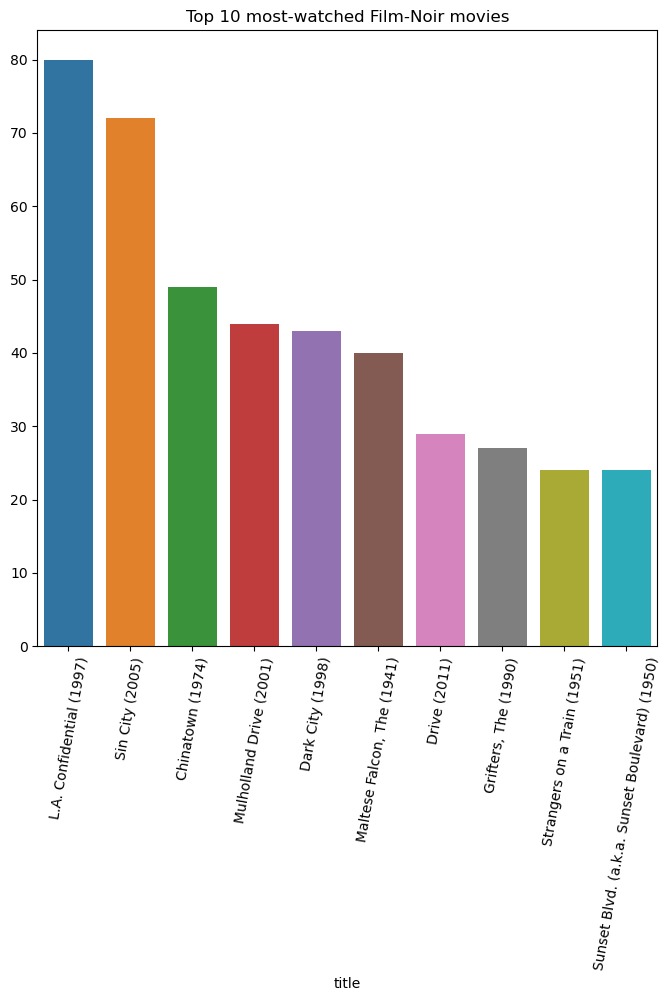

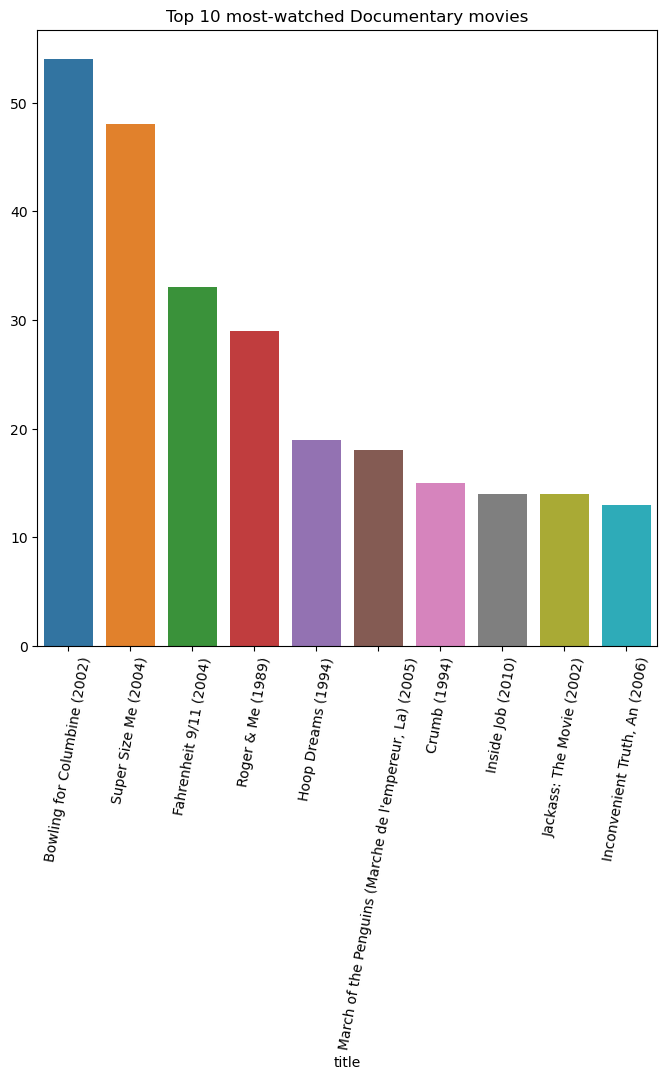

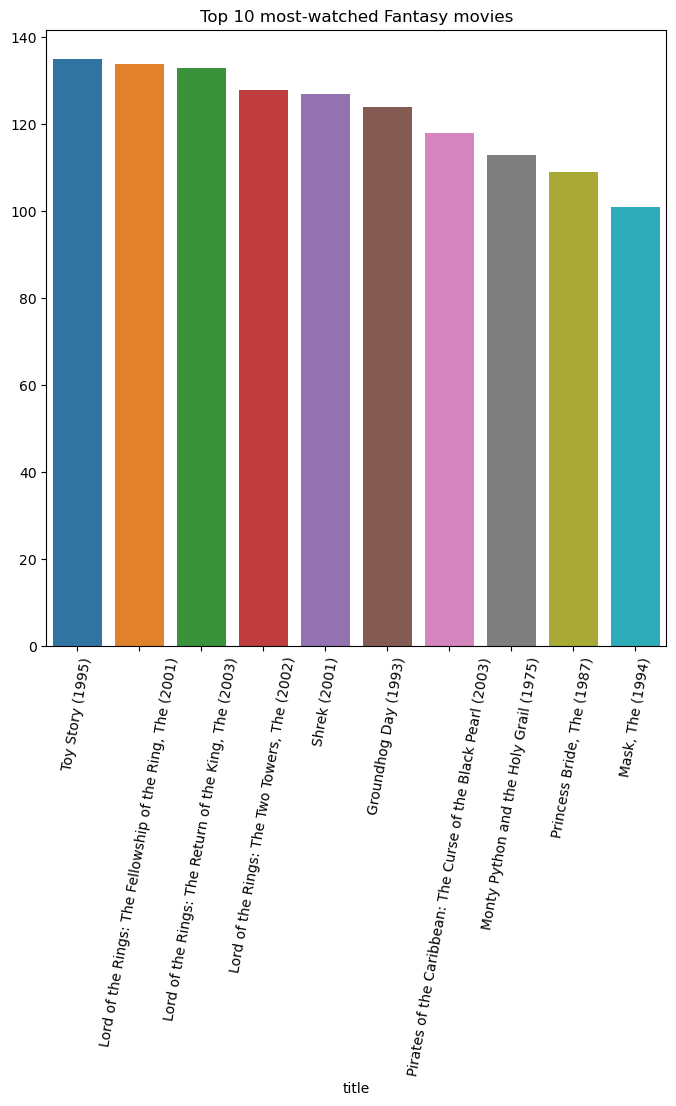

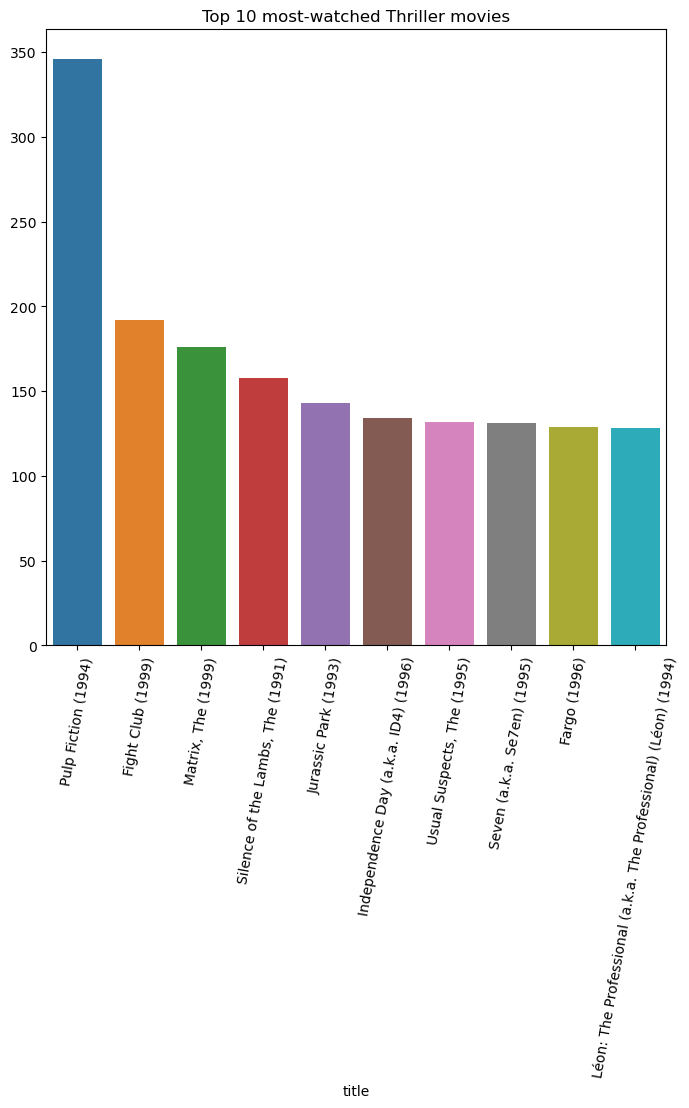

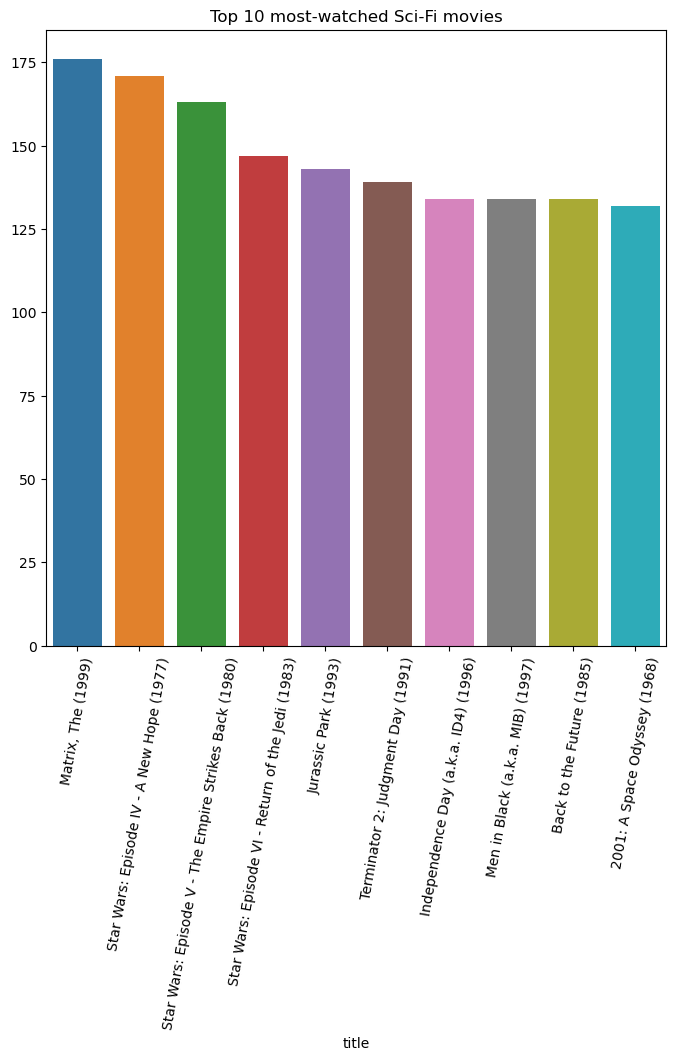

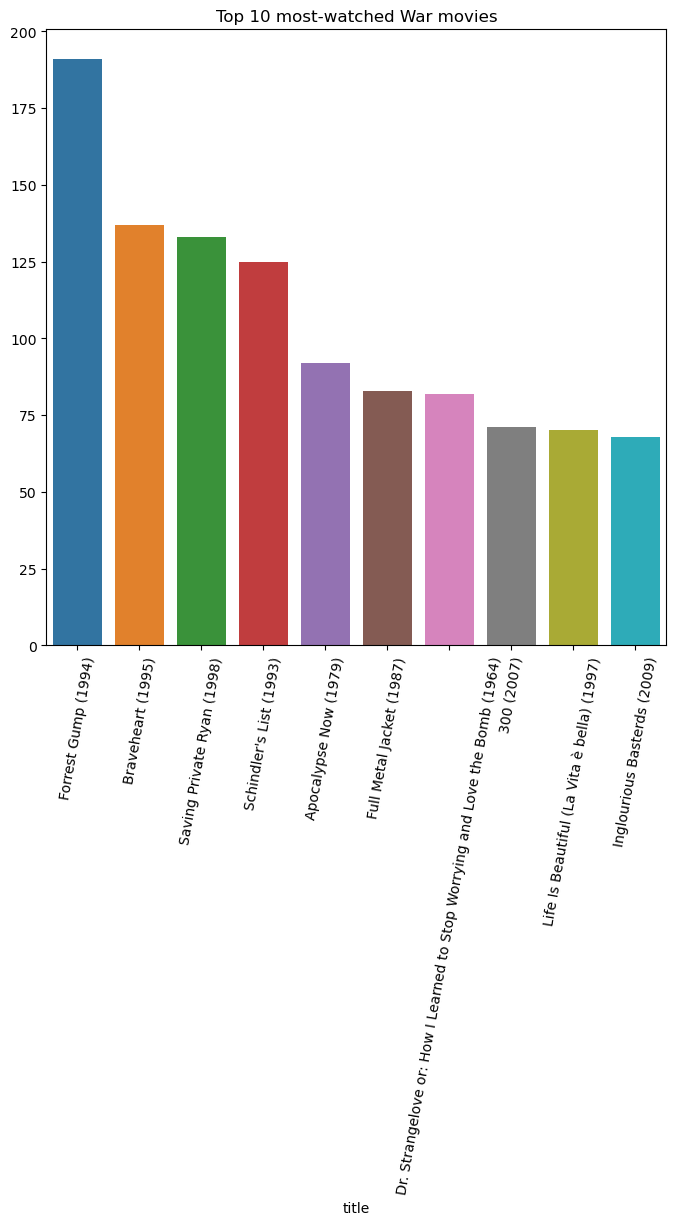

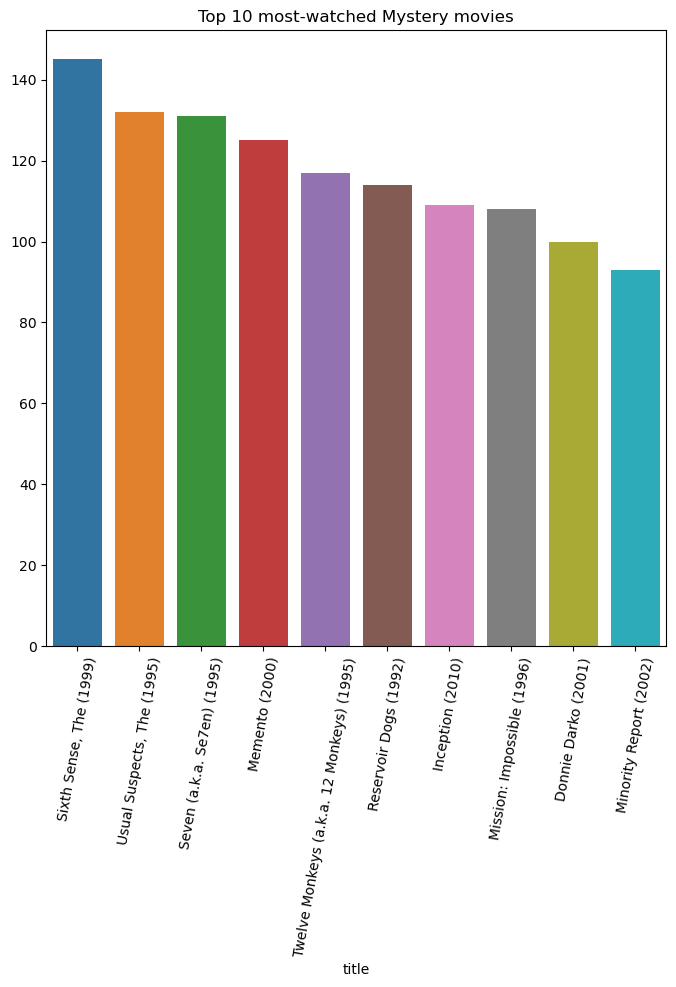

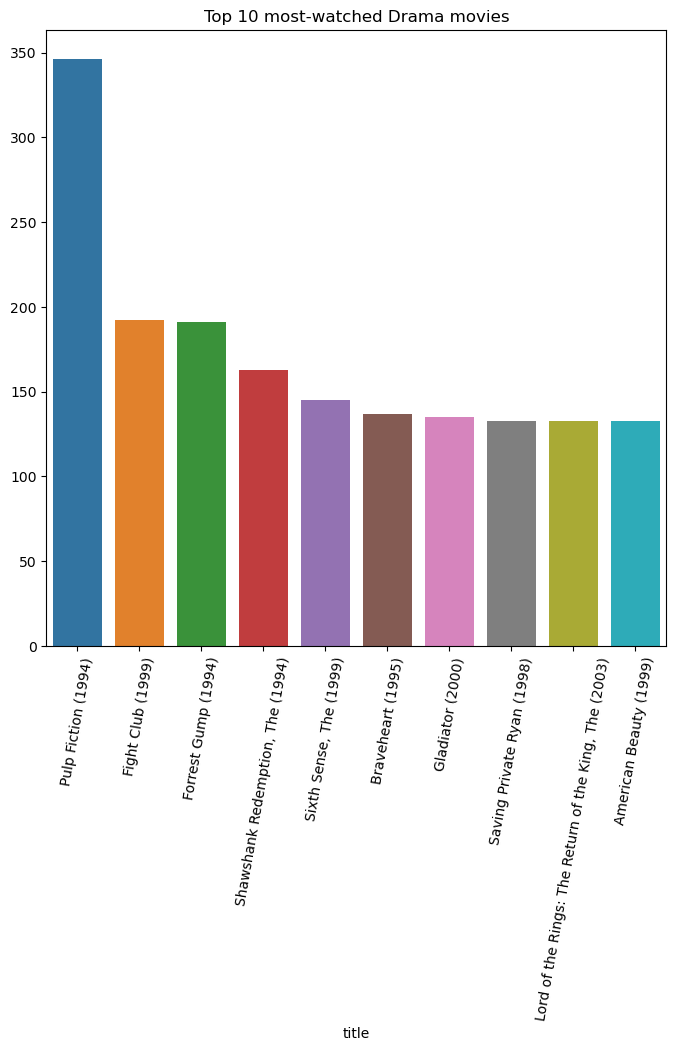

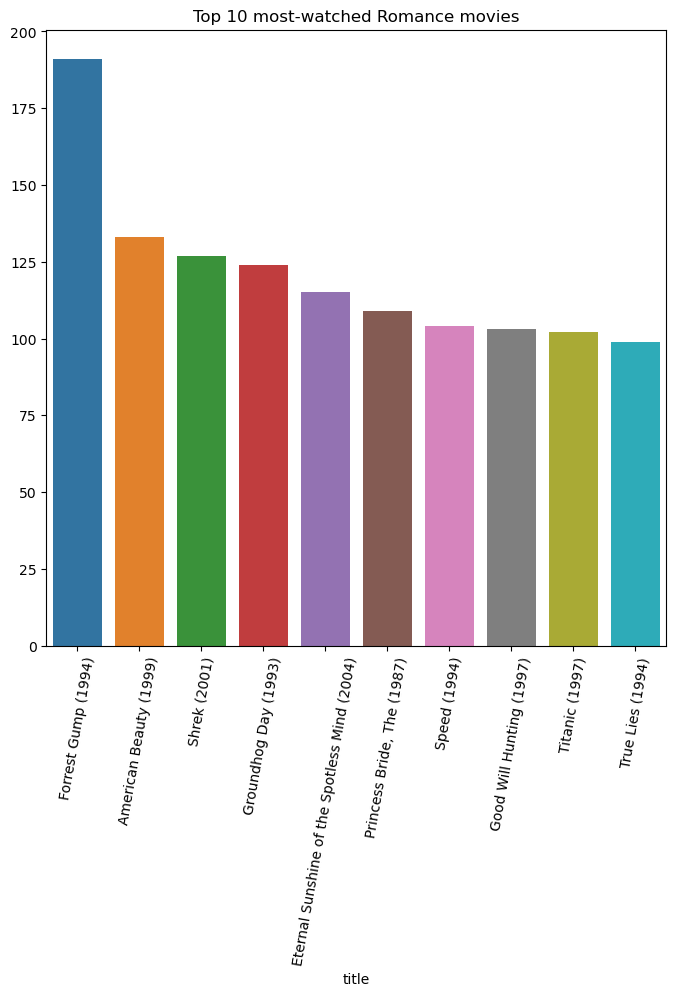

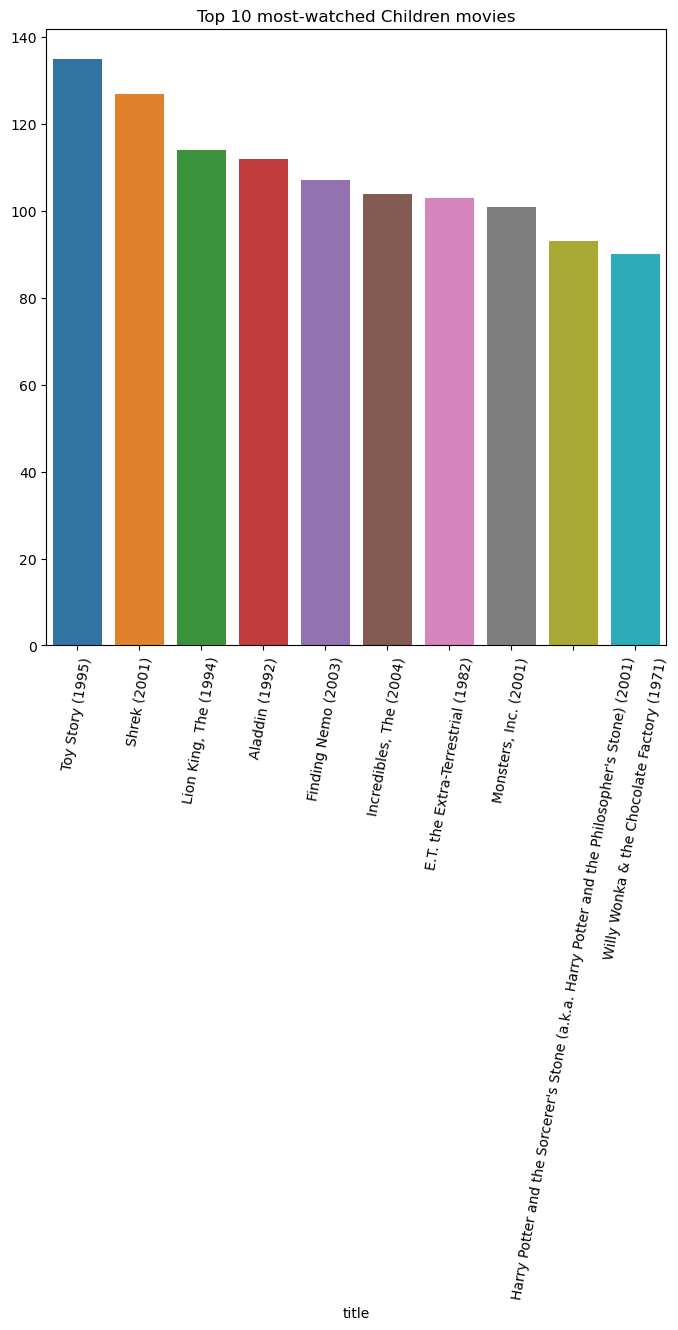

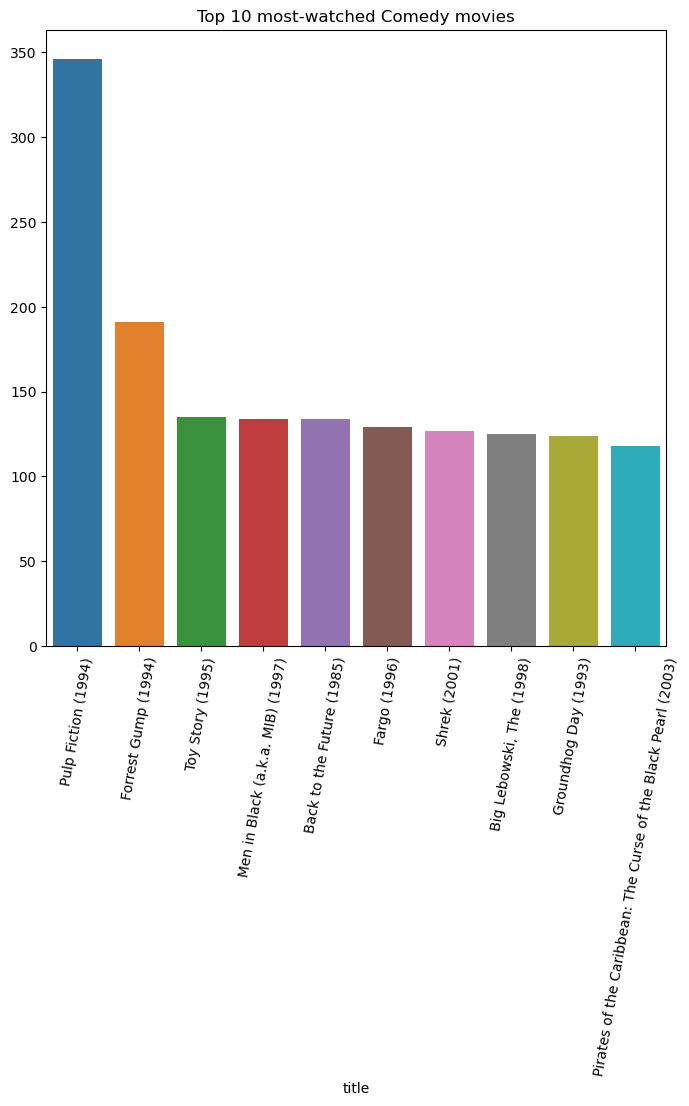

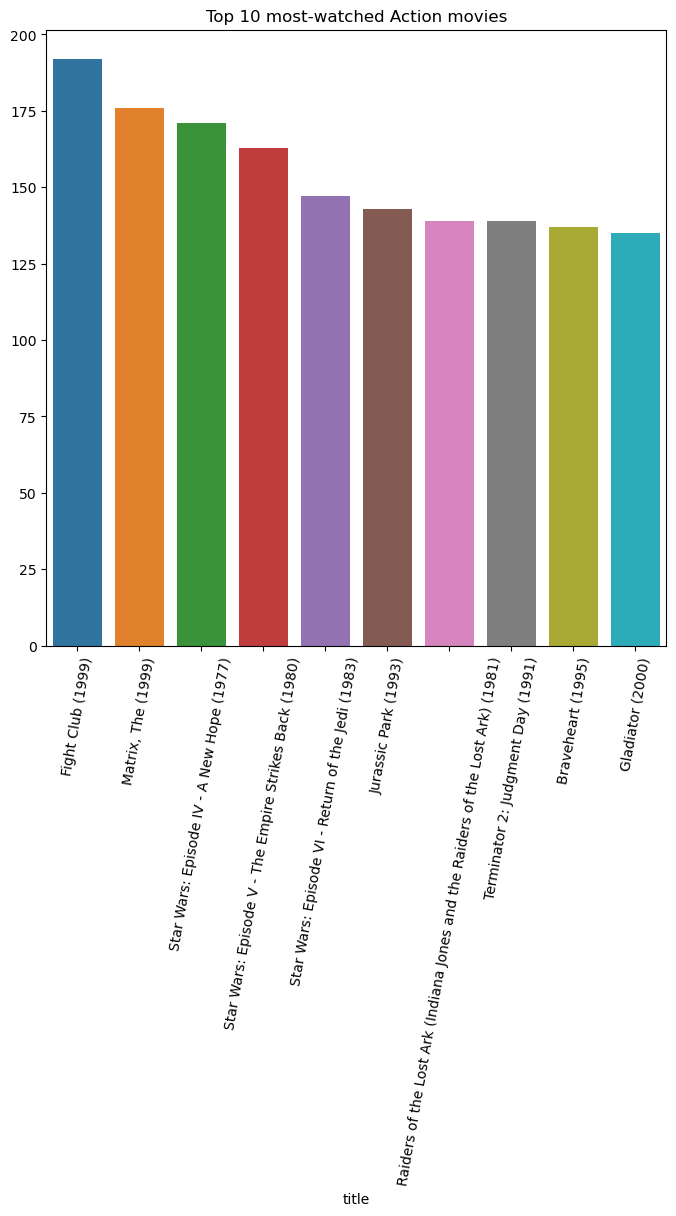

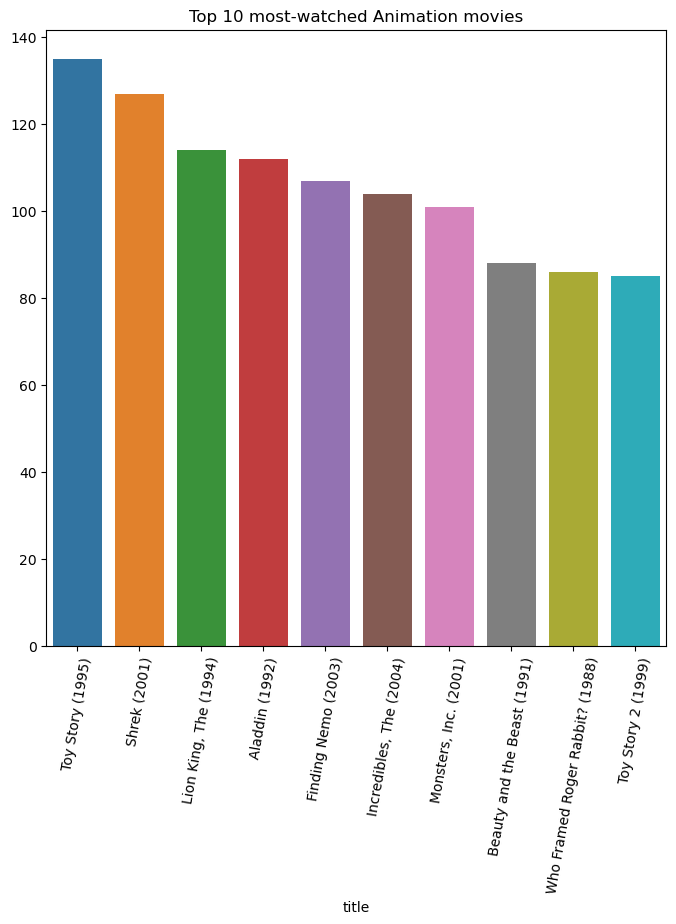

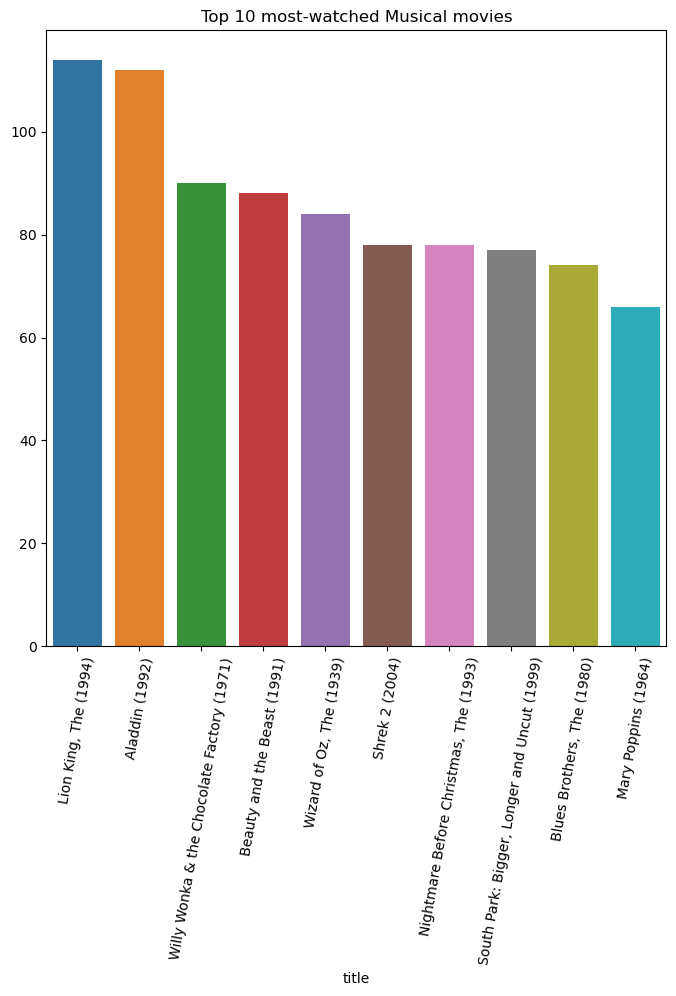

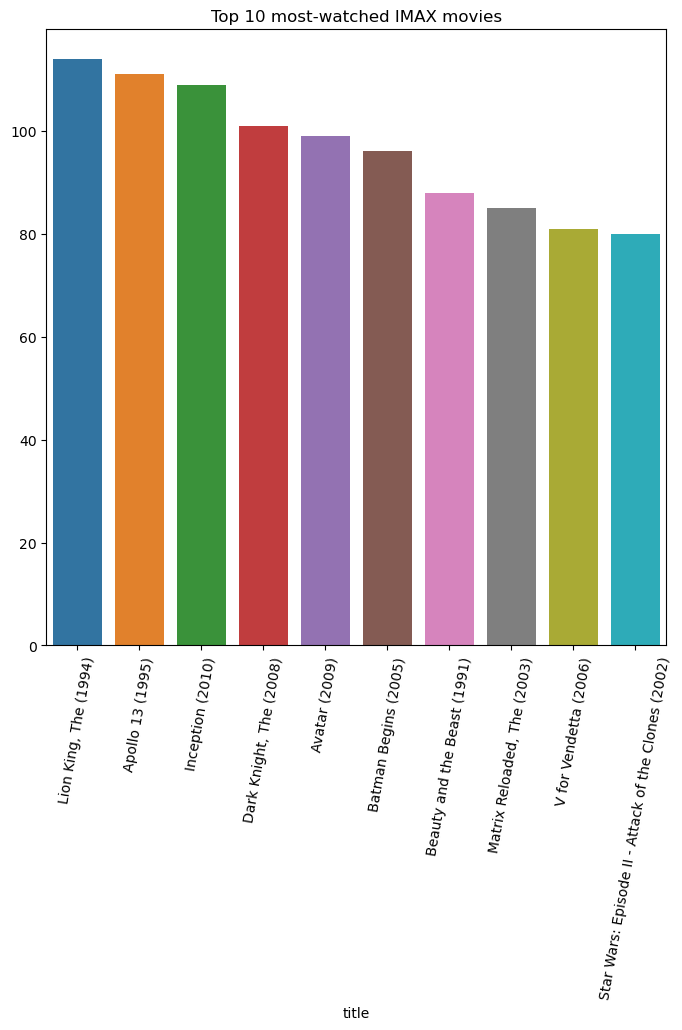

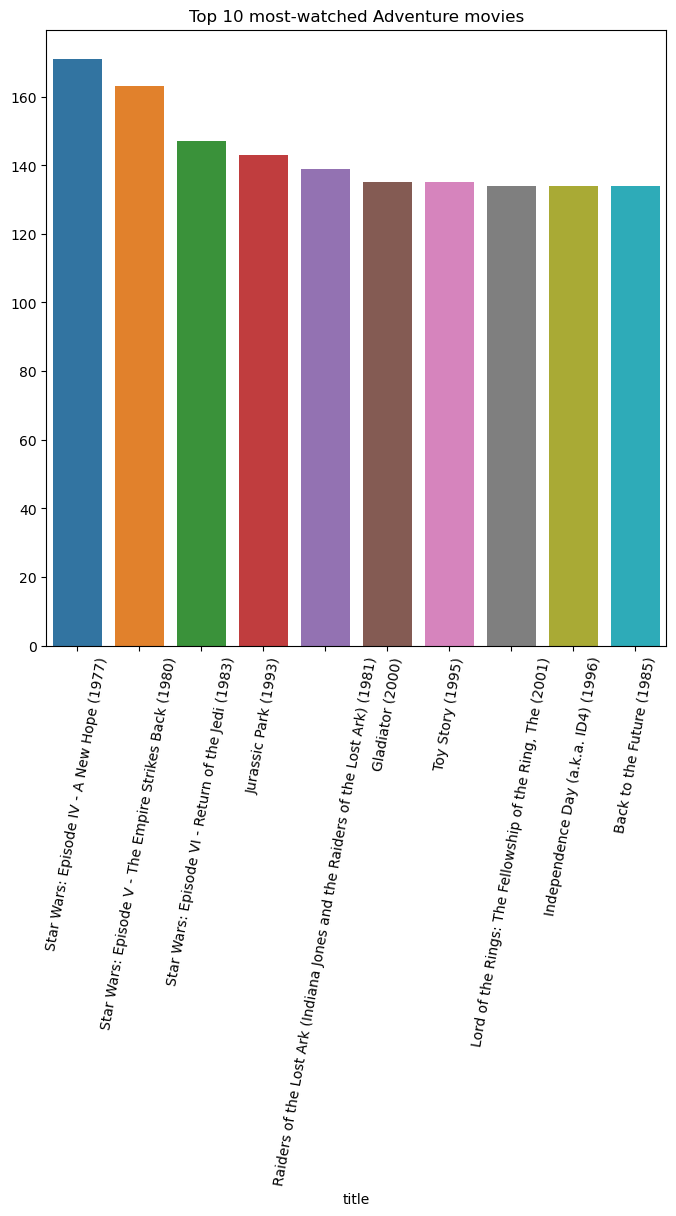

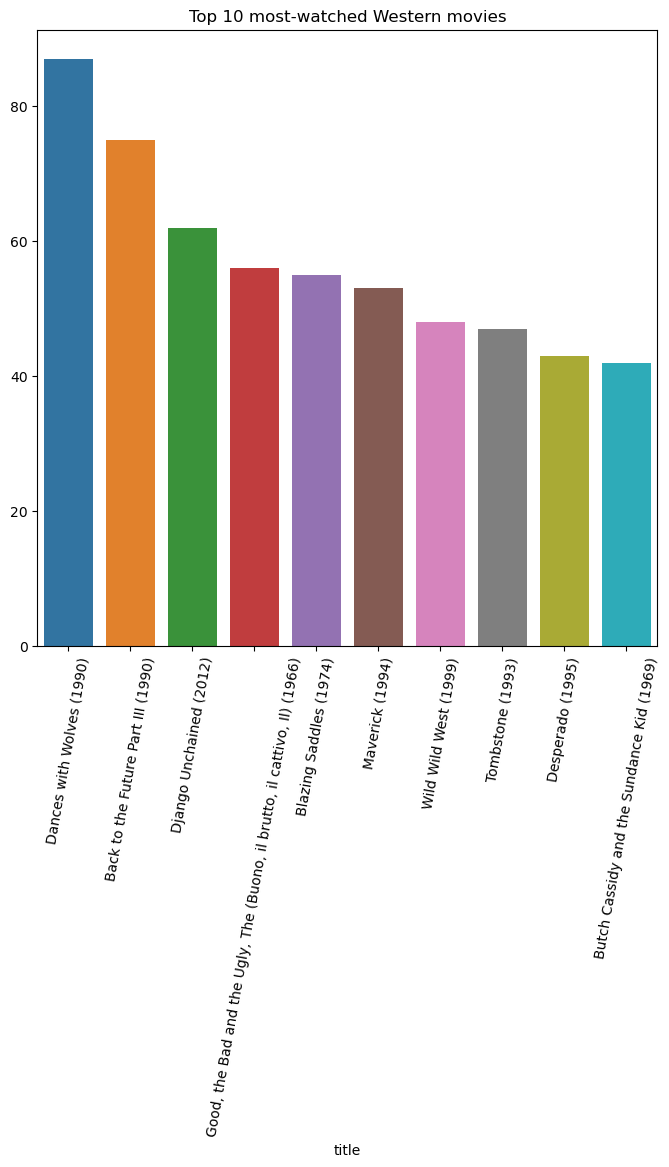

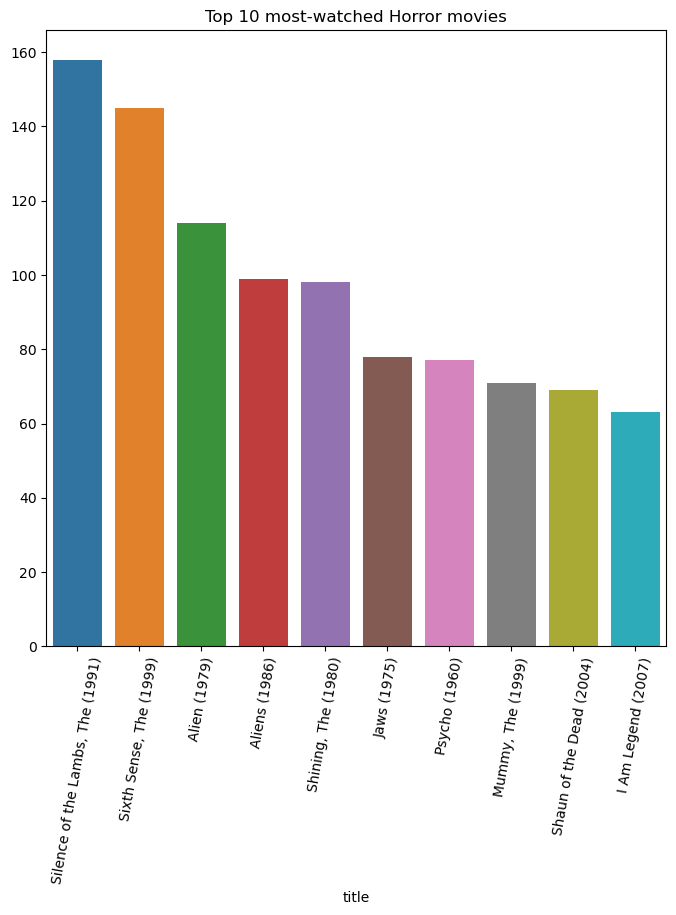

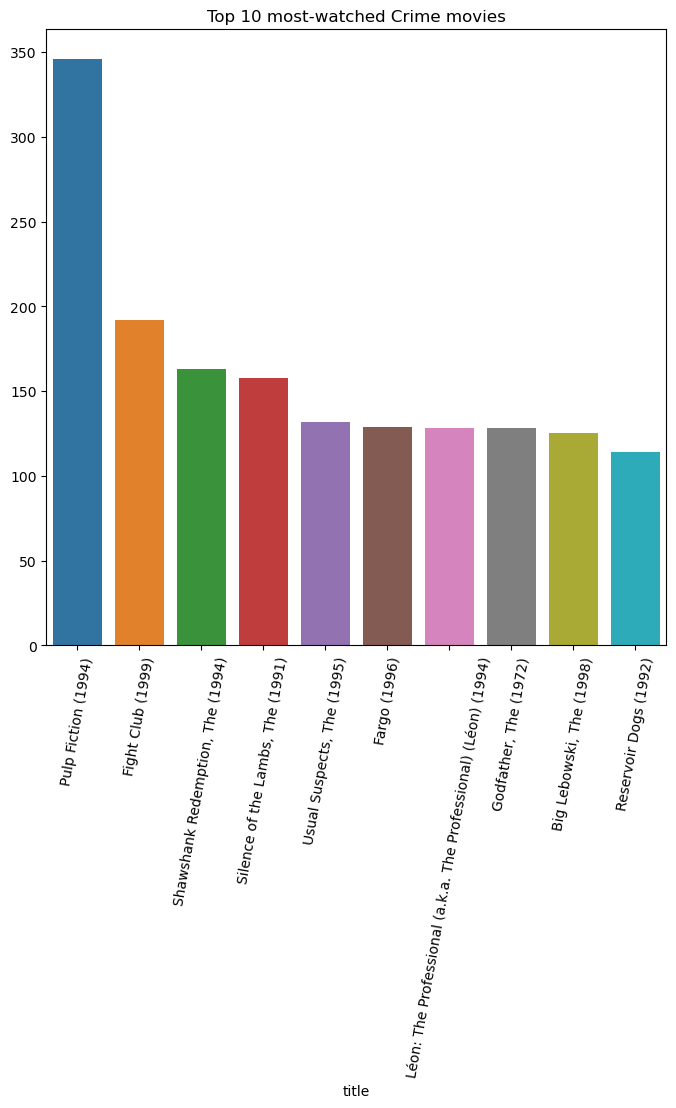

In [ ]:
for gen in matrix3.columns[1:]:
    x = matrix3[(matrix3[gen]==True)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
    sns.barplot(x= topmovies.index, y= topmovies.values)
    plt.title('Top 10 most-watched '+gen+' movies')
    plt.xticks(rotation=80);